<a href="https://colab.research.google.com/github/Manikanta-204/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name   - Zomato Restaurant Clutering And Sentiment Analysis**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** $\color{green}{\text{Manikanta Bommisetti}}$


# **Project Summary -**

The project aims to analyze the restaurant data from Zomato, an Indian restaurant aggregator and food delivery start-up. The data includes information, menus, and user-reviews of restaurants, as well as food delivery options. By analyzing this data, the project seeks to gain insights into the Indian food industry in each city, with a focus on customers and the company itself.

The analysis involves sentiment analysis of customer reviews and the creation of visualizations to draw useful conclusions. Additionally, the project involves clustering the Zomato restaurants into different segments to facilitate analysis and solve business cases. The data's valuable information on cuisine and costing can also be utilized for cost vs. benefit analysis.

# **GitHub Link -**

https://github.com/Manikanta-204/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [104]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#Non-negative matrix Factorization
from sklearn.decomposition import NMF

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Dataset Loading

In [105]:
#mounting google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [106]:
# Load Dataset
meta_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/Zomato Restaurant reviews.csv')

### Dataset First View

In [107]:
# Dataset First Look
meta_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [108]:
#Reviews Dataset First Look
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [109]:
# Dataset Rows & Columns count
print(f'Total observations for Zomato restaurant names and metadata : {meta_df.shape} ')
print(f'Total observations for Zomato restaurant reviews : {reviews_df.shape} ')

Total observations for Zomato restaurant names and metadata : (105, 6) 
Total observations for Zomato restaurant reviews : (10000, 7) 


### Dataset Information

In [110]:
#Restaurant Names and Metadata Dataset Info
meta_df.info()
print('\n')
#Restaurant Reviews Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [111]:
# Dataset Duplicate Value Count
duplicates_meta = meta_df.duplicated().sum()
print(f'Zomato Restaurant Names and Metadata have {duplicates_meta} duplicates')
duplicates_rv = reviews_df.duplicated().sum()
print(f'Zomato Restaurant reviews have {duplicates_rv} duplicates')

Zomato Restaurant Names and Metadata have 0 duplicates
Zomato Restaurant reviews have 36 duplicates


In [112]:
reviews_df[reviews_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

#### Missing Values/Null Values

In [113]:
# Missing Values/Null Values Count for Names and metadata
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

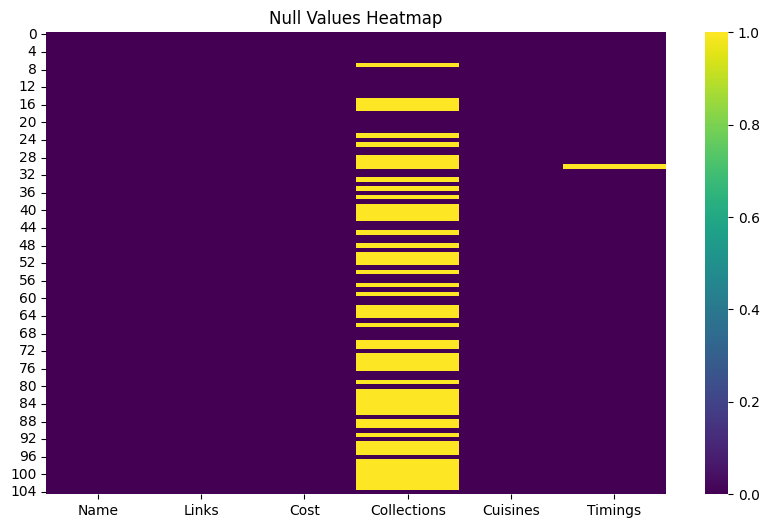

In [114]:
# Visualizing the missing values
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(meta_df.isnull(), cmap='viridis', annot=False)
plt.title('Null Values Heatmap')
plt.show()

In [115]:
# Missing Values/Null Values Count for reviews data
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

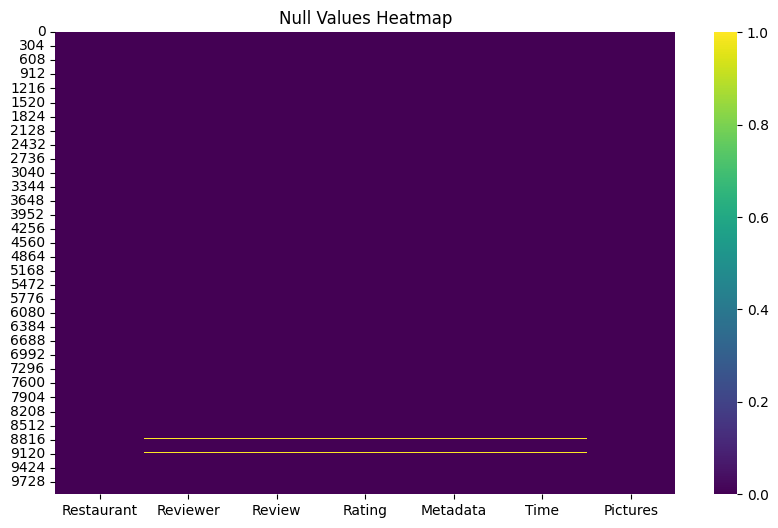

In [116]:
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(reviews_df.isnull(), cmap='viridis', annot=False)
plt.title('Null Values Heatmap')
plt.show()

### What did you know about your dataset?

**Restaurant DataSet**

*   There are 105 total observation with 6 different features.
*   Feature like collection and timing has null values.
*   There is no duplicate values i.e., 105 unique data.
*   Feature cost represent amount but has object data type because these values are separated by comma ','.
*   Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**



*   There are total 10000 observation and 7 features.
*   Except picture and restaurant feature all others have null values.
*   There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
*    Rating represent ordinal data, has object data type should be integer.
*    Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [117]:
# Restaurant Metadata Dataset Columns
meta_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [118]:
#Reviews Dataset Columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [119]:
# Restaurant Metadata Dataset Describe
meta_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [120]:
#Reviews Dataset Describe
reviews_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

**Restaurant Metadata :**

Name : Name of Restaurants  listed in the dataset.


Links : Each restaurant in the dataset is associated with a URL that provides more information about the restaurant.

Cost : The price range of restaurants varies from INR 150 to INR 2,800.

Collection :TThe restaurants are categorized into different collections, such as Food Hygiene Rated Restaurants, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings, etc.


Cuisines : The dataset includes a variety of cuisines, including Chinese, Continental, Kebab, European, South Indian, North Indian, Biryani, Seafood, Mediterranean, Desserts, Healthy Food, Lebanese, Ice Cream, Fast Food, Street Food, American, Andhra, Italian, Mexican, Mughlai, Bakery, Japanese, etc.


Timings : The restaurants have different operating hours, ranging from early morning to late night. The opening and closing times vary between establishments.

**Restaurant Reviews :**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [121]:
# Check Unique Values for each variable in restuarent data.
for column in meta_df.columns:
    unique_values = meta_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

The unique values of Name are: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavacharu' '

In [122]:
# Check Unique Values for each variable for restaurant
for i in meta_df.columns.tolist():
  print("No. of unique values in ",i,"is",meta_df[i].nunique())

No. of unique values in  Name is 105
No. of unique values in  Links is 105
No. of unique values in  Cost is 29
No. of unique values in  Collections is 42
No. of unique values in  Cuisines is 92
No. of unique values in  Timings is 77


In [123]:
# Check Unique Values for each variable in reviews data.
for column in reviews_df.columns:
    unique_values = reviews_df[column].unique()
    print(f"The unique values of {column} are: {unique_values}")

The unique values of Restaurant are: ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom' 'Ulavach

In [124]:
# Check Unique Values for each variable for reviews
for i in reviews_df.columns.tolist():
  print("No. of unique values in ",i,"is",reviews_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [125]:
# Write your code to make your dataset analysis ready.
resta_df = meta_df.copy()
review = reviews_df.copy()

In [126]:
#Checking unique values of cost
resta_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [127]:
# changing the data type of the cost function
resta_df['Cost'] = resta_df['Cost'].str.replace(",","").astype('int64')

In [128]:
#top 5 costlier restaurant
resta_df.nlargest(5, 'Cost')[['Name', 'Cost']]


Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
18                                  10 Downing Street  1900
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

In [129]:
#top 5 lowest price restaurants
resta_df.nsmallest(5, 'Cost')[['Name', 'Cost']]

Name  Cost
23                 Amul   150
89  Mohammedia Shawarma   150
29   Hunger Maggi Point   200
54       Asian Meal Box   200
59            KS Bakers   200

In [130]:
#max restaurants that share same price
same_price_df = resta_df.groupby('Cost')['Name'].agg(['count', lambda x: x.tolist()]).reset_index()
same_price_df.columns = ['Cost', 'Total_Restaurant','Name of Restaurants']
same_price_df = same_price_df.sort_values('Total_Restaurant', ascending=False).head(5)
print(same_price_df)


    Cost  Total_Restaurant                                Name of Restaurants
7    500                13  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...
9    600                10  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...
11   700                 8  [Marsala Food Company, Green Bawarchi Restaura...
18  1200                 7  [Over The Moon Brew Company, The Glass Onion, ...
16  1000                 6  [Hyper Local, Tiki Shack, Pista House, La La L...


In [131]:
#Restaurants which has max price
same_price_df.nlargest(5, 'Cost')

Cost  Total_Restaurant                                Name of Restaurants
18  1200                 7  [Over The Moon Brew Company, The Glass Onion, ...
16  1000                 6  [Hyper Local, Tiki Shack, Pista House, La La L...
11   700                 8  [Marsala Food Company, Green Bawarchi Restaura...
9    600                10  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...
7    500                13  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...

In [132]:
# storing all the cusines
cuisine_value_list = resta_df['Cuisines'].str.split(', ').apply(lambda x: [cuisine.strip() for cuisine in x])


In [133]:
from collections import Counter

# converting the dict to a data frame
cuisine_counter = Counter([cuisine for cuisine_names in cuisine_value_list for cuisine in cuisine_names])
cuisine_df = pd.DataFrame.from_dict(cuisine_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Cuisine'})
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False).head(5)


In [134]:
print(cuisine_counter)

Counter({'North Indian': 61, 'Chinese': 43, 'Continental': 21, 'Biryani': 16, 'Asian': 15, 'Fast Food': 15, 'Italian': 14, 'Desserts': 13, 'South Indian': 9, 'Bakery': 7, 'Kebab': 6, 'American': 6, 'Mughlai': 6, 'Andhra': 6, 'Cafe': 6, 'Mediterranean': 5, 'Beverages': 5, 'Burger': 5, 'Salad': 5, 'European': 4, 'Seafood': 4, 'Sushi': 4, 'Hyderabadi': 4, 'Momos': 4, 'Thai': 3, 'Ice Cream': 2, 'Street Food': 2, 'BBQ': 2, 'Finger Food': 2, 'Japanese': 2, 'Arabian': 2, 'Modern Indian': 2, 'Goan': 1, 'Healthy Food': 1, 'Lebanese': 1, 'Mexican': 1, 'Juices': 1, 'Spanish': 1, 'Wraps': 1, 'Indonesian': 1, 'Pizza': 1, 'North Eastern': 1, 'Mithai': 1, 'Malaysian': 1})


In [135]:
print(top_5_cuisines)

         Cuisine  Number of Restaurants
5   North Indian                     61
0        Chinese                     43
1    Continental                     21
6        Biryani                     16
18     Fast Food                     15


In [136]:
# spliting the cusines and storing in list
Collections_value_list = resta_df['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])
print(Collections_value_list)


0      [Food Hygiene Rated Restaurants in Hyderabad, ...
1                                  [Hyderabad's Hottest]
2                   [Great Buffets, Hyderabad's Hottest]
3                               [Late Night Restaurants]
4      [Best Bars & Pubs, Food Hygiene Rated Restaura...
5      [Sunday Brunches, Corporate Favorites, Great B...
6          [Food Hygiene Rated Restaurants in Hyderabad]
8      [Great Buffets, Live Sports Screenings, Best B...
9                                      [Frozen Delights]
10       [Street Food, Veggie Friendly, Pocket Friendly]
11                                    [Barbecue & Grill]
12                                       [Great Buffets]
13     [Corporate Favorites, Happy Hours, Live Sports...
14     [Barbecue & Grill, Great Buffets, Corporate Fa...
18                                  [Trending This Week]
19                                  [Trending This Week]
20                                     [Veggie Friendly]
21                      [Great 

In [137]:
# converting the dict to a data frame
collections_counter = Counter(collection for collections in Collections_value_list for collection in collections)
Collections_df = pd.DataFrame.from_dict(collections_counter, orient='index', columns=['Number of Restaurants']).reset_index().rename(columns={'index': 'Tags'})

#top 5 collection
Collections_df.nlargest(5,'Number of Restaurants')

Tags  Number of Restaurants
2                                Great Buffets                     11
0  Food Hygiene Rated Restaurants in Hyderabad                      8
5                       Live Sports Screenings                      7
6                          Hyderabad's Hottest                      7
1                          Corporate Favorites                      6

**Reviews :**

In [138]:
# to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [139]:
#There is on rating value with string format
review[(review['Rating']=='Like')].head()

Restaurant           Reviewer  \
7601  The Old Madras Baking Company  Dhanasekar Kannan   

                                                 Review Rating  \
7601  One of the best pizzas to try. It served with ...   Like   

                       Metadata             Time  Pictures  
7601  12 Reviews , 21 Followers  5/18/2019 12:31         1

In [140]:
# converting it to 0 since no rating is 0 then to mean
review.loc[review['Rating'] == 'Like'] = 3.6

#changing data type for rating in review data
review['Rating']= review['Rating'].astype('float64')


In [141]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54       0.0  
1  3 Reviews , 2 Followers  5/25/2019 14:20       0.0  
2  2 Reviews , 3 Followers  5/24/2019 22:54       0.0  
3    1 Review , 1 Follower  5/24/2019 22:11       0.0  
4  3 Reviews , 2 Followers  5/24/2019 21:37       0.0

In [142]:
#changing date and extracting few feature for manipulation
review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour



<ipython-input-142-6cae22fd0419>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str


In [143]:
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00       0.0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00       0.0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00       0.0   
3    1 Review , 1 Follower 2019-05-24 22:11:00       0.0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00       0.0   

   Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                    1.0                 2.0       2019.0           5.0   
1                    3.0                 2.0       2019.0           5.0   
2                    2.0                 3.0       2019.0           5.0   
3                    1.0                 1.0       2019.0           5.0   
4                    3.0                 2.0       2019.0           5.0   

   Review_Hour  
0         15.0  
1         14.0  
2         22.0  
3         22.0  
4         21.0

In [144]:
#Average rate of prefered restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                                      3.6    3.60             1
1                        10 Downing Street    3.80           100
2                                 13 Dhaba    3.48           100
3           3B's - Buddies, Bar & Barbecue    4.76           100
4                AB's - Absolute Barbecues    4.88           100
..                                     ...     ...           ...
96              Urban Asia - Kitchen & Bar    3.65           100
97   Yum Yum Tree - The Arabian Food Court    3.56           100
98         Zega - Sheraton Hyderabad Hotel    4.45           100
99                Zing's Northeast Kitchen    3.65           100
100                                eat.fit    3.20           100

[101 rows x 3 columns]

In [145]:
#usless data
review[review['Restaurant'] == 3.6]

Restaurant Reviewer Review  Rating Metadata  \
7601        3.6      3.6    3.6     3.6      3.6   

                              Time  Pictures  Reviewer_Total_Review  \
7601 1970-01-01 00:00:00.000000003       3.6                    NaN   

      Reviewer_Followers  Review_Year  Review_Month  Review_Hour  
7601                 NaN       1970.0           1.0          0.0

In [146]:
#top 5 most prefered or rated restaurant
avg_hotel_rating.nlargest(5,'Rating')

Restaurant  Rating  Total_Review
4        AB's - Absolute Barbecues    4.88           100
12                          B-Dubs    4.81           100
3   3B's - Buddies, Bar & Barbecue    4.76           100
68                        Paradise    4.70           100
36                        Flechazo    4.66           100

In [147]:
#top 5 lowest rated restaurant
avg_hotel_rating.nsmallest(5,'Rating')

Restaurant  Rating  Total_Review
42  Hotel Zara Hi-Fi   2.400           100
11    Asian Meal Box   2.580           100
67     Pakwaan Grand   2.710           100
58     Mathura Vilas   2.820           100
15   Behrouz Biryani   2.825           100

In [148]:
# Checking the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
                                                        'Reviewer_Followers':'max',
                                                        'Rating':'mean'}).reset_index().rename(
                                                            columns={'Rating':'Average_Rating_Given'}
                                                        ).sort_values('Reviewer_Followers', ascending = False)
print(most_followed_reviewer[:5])

               Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average_Rating_Given  
5464              3.666667  
1702              5.000000  
5236              3.500000  
1788              4.500000  
6230              3.714286  


In [149]:
#finding which year prefered to show maximum
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
print(hotel_year)

   Review_Year                                         Restaurant  Count
0       1970.0                                              [3.6]      1
1       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
2       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
3       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
4       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802


In [150]:
#merging both data frames
resta_df = resta_df.rename(columns = {'Name':'Restaurant'})
merged_df = resta_df.merge(review, on = 'Restaurant')
merged_df.shape


(9999, 17)

In [151]:
#Price point of restaurants
price_point = merged_df.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [152]:
#price point for high rated restaurants
price_point.nlargest(5,'Rating')

Restaurant  Rating  Price_Point
3        AB's - Absolute Barbecues    4.88       1500.0
11                          B-Dubs    4.81       1600.0
2   3B's - Buddies, Bar & Barbecue    4.76       1100.0
67                        Paradise    4.70        800.0
35                        Flechazo    4.66       1300.0

In [153]:
#price point for lowest rated restaurants
price_point.nsmallest(5,'Rating')

Restaurant  Rating  Price_Point
41  Hotel Zara Hi-Fi   2.400        400.0
10    Asian Meal Box   2.580        200.0
66     Pakwaan Grand   2.710        400.0
57     Mathura Vilas   2.820        500.0
14   Behrouz Biryani   2.825        600.0

In [154]:
#Rating count by reviewer
rating_count_df = pd.DataFrame(review['Reviewer'].value_counts().reset_index()).rename(columns={'index': 'Reviewer', 'Reviewer': 'Rating_Count'})
rating_count_df.head(5)


Reviewer  Rating_Count
0        Ankita            13
1   Parijat Ray            13
2         Kiran            12
3  Vedant Killa            11
4     Jay Mehta            11

### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

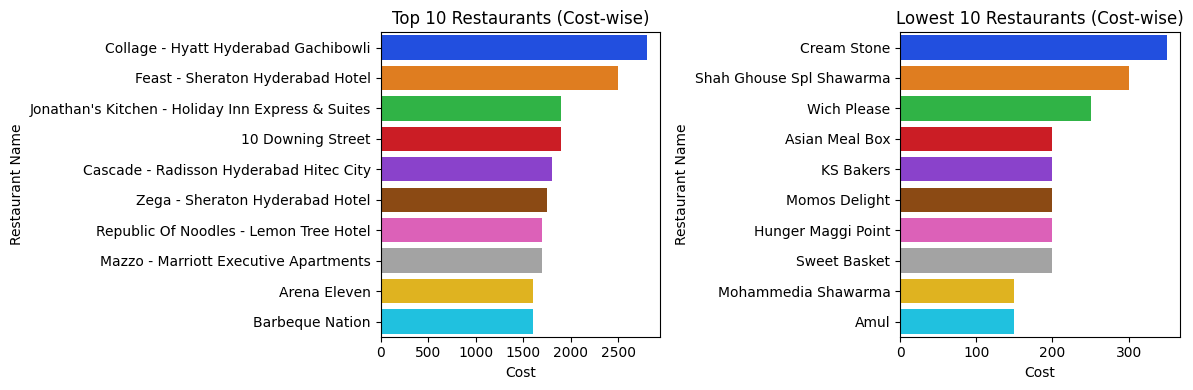

In [155]:
# Chart - 1 visualization code
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
price_of_restaurants = resta_df.sort_values('Cost', ascending = False)[['Restaurant','Cost']]
sns.barplot(data = price_of_restaurants[:10], x = "Cost", y='Restaurant',ax=ax1, palette = 'bright')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Restaurant Name')
ax1.set_title('Top 10 Restaurants (Cost-wise)')

sns.barplot(data = price_of_restaurants[-10:], x = "Cost", y='Restaurant',ax=ax2, palette = 'bright')
ax2.set_xlabel('Cost')
ax2.set_ylabel('Restaurant Name')
ax2.set_title('Lowest 10 Restaurants (Cost-wise)')
# Adjust the spacing between subplots
fig.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the values one with other

##### 2. What is/are the insight(s) found from the chart?

I found the top most prefered restaurants with cost wise

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can say that collage-Hyatt Hyderabad Gachibowli and Feast-Shearton Hyderabad Hotel has high cost

#### Chart - 2

In [156]:
# Splitting the cuisines into individual values
cuisine_list = resta_df['Cuisines'].str.split(', ')

# Flattening the list of lists into a single list
cuisine_flat_list = [cuisine for sublist in cuisine_list for cuisine in sublist]

# Counting the occurrences of each cuisine
cuisine_counts = pd.Series(cuisine_flat_list).value_counts()

# Displaying the cuisine counts
print(cuisine_counts)

North Indian     61
Chinese          43
Continental      21
Biryani          16
Fast Food        15
Asian            15
Italian          14
Desserts         13
South Indian      9
Bakery            7
Kebab             6
Cafe              6
Andhra            6
Mughlai           6
American          6
Salad             5
Burger            5
Mediterranean     5
Beverages         5
Momos             4
Seafood           4
European          4
Hyderabadi        4
Sushi             4
Thai              3
Modern Indian     2
Arabian           2
Ice Cream         2
Street Food       2
Japanese          2
Finger Food       2
BBQ               2
Pizza             1
North Eastern     1
Mithai            1
Indonesian        1
Juices            1
Wraps             1
Spanish           1
Mexican           1
Goan              1
Healthy Food      1
Lebanese          1
Malaysian         1
dtype: int64


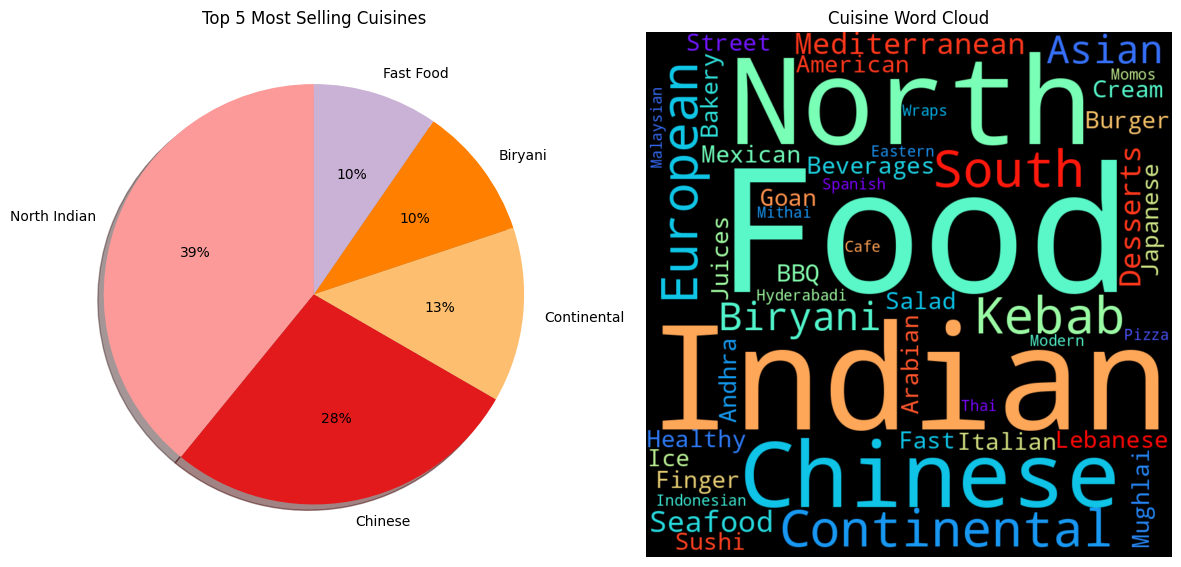

In [157]:
# Chart - 2 visualization code
# Get the corresponding cuisine names for the top 5 cuisines
labels = cuisine_df.sort_values('Number of Restaurants', ascending=False)['Cuisine'].head(5).tolist()

# Get the corresponding number of restaurants for the top 5 cuisines
top_5_cuisines = cuisine_df.sort_values('Number of Restaurants', ascending=False)['Number of Restaurants'].head(5).tolist()

# Define a color palette for the pie chart
colors = sns.color_palette('Paired')[4:9]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart on the first subplot
ax1.pie(top_5_cuisines, labels=labels, colors=colors, autopct='%.0f%%', startangle=90, shadow=True)
ax1.set_title('Top 5 Most Selling Cuisines')

# Generate word cloud text
text = " ".join(name for name in cuisine_df.Cuisine)

# Create the word cloud on the second subplot
word_cloud = WordCloud(width=800, height=800, collocations=False, colormap='rainbow',
                       background_color='black').generate(text)
ax2.imshow(word_cloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Cuisine Word Cloud')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart helps to compare the what amount of values with others and word cloud imshow plot to represent textual data in a visually appealing and informative manner

##### 2. What is/are the insight(s) found from the chart?

North indian and chinese cuisines are high selling food

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights help creating a positive business impact

#### Chart - 3

In [158]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]

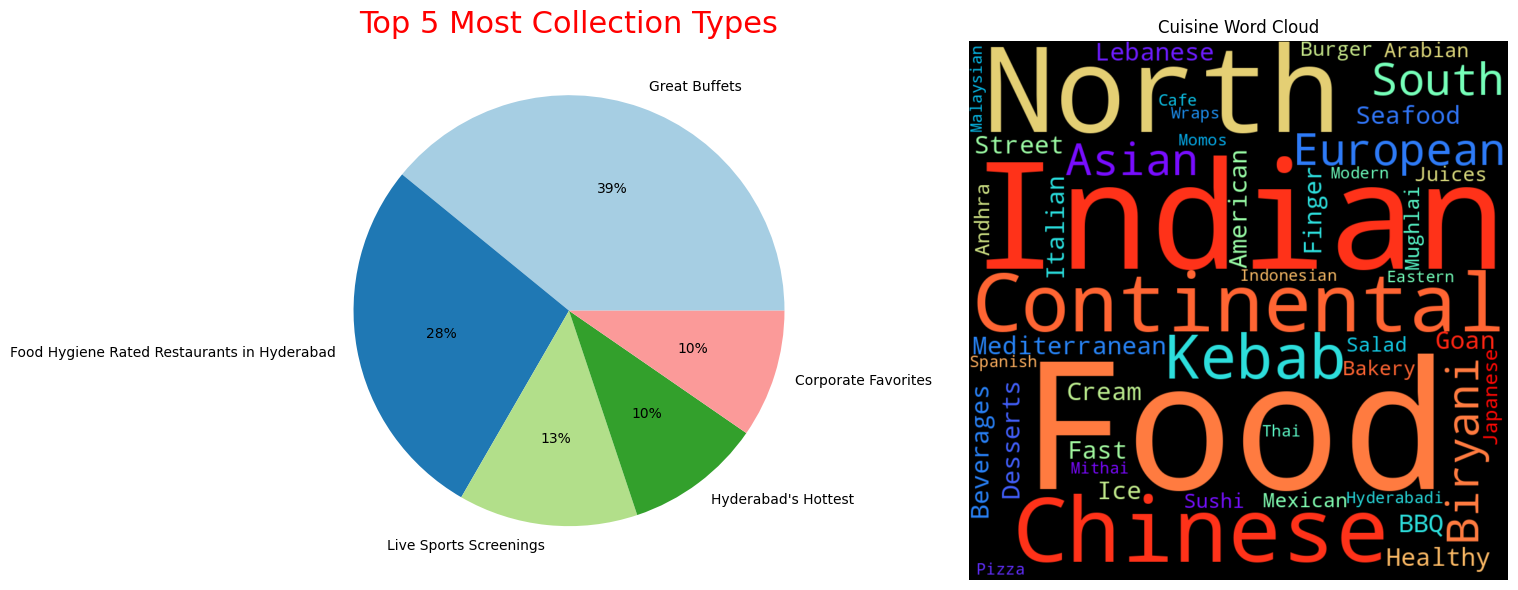

In [159]:
# Chart - 3 visualization code

data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#create pie chart
ax1.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
ax1.set_title('Top 5 Most Collection Types', size =22, color= 'red')

# Generate word cloud text for cuisine
text = " ".join(name for name in cuisine_df.Cuisine)

# Create the word cloud for cuisine on the second subplot
word_cloud = WordCloud(width=800, height=800, collocations=False, colormap='rainbow',
                       background_color='black').generate(text)
ax2.imshow(word_cloud, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Cuisine Word Cloud')

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart helps to compare the what amount of values with others and word cloud imshow plot to represent textual data in a visually appealing and informative manner

##### 2. What is/are the insight(s) found from the chart?

Great Buffets and Food hygiene Restaurants in hyderabad collections are most prefered

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights help creating a positive business impact

#### Chart - 4

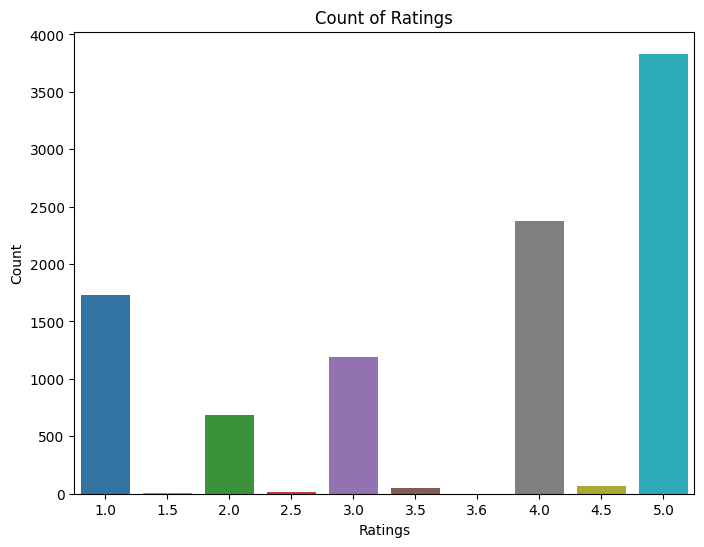

In [160]:
# Chart - 4 visualization code
review['Rating'] = review['Rating'].astype(float)

# Create a count plot for the ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=review, x='Rating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot helps to find the count of dfferent kind of ratings

##### 2. What is/are the insight(s) found from the chart?

we can observe the most rating values given by reviewers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the people given 4 and 5 ratings it help creating a positive business impact

#### Chart - 5

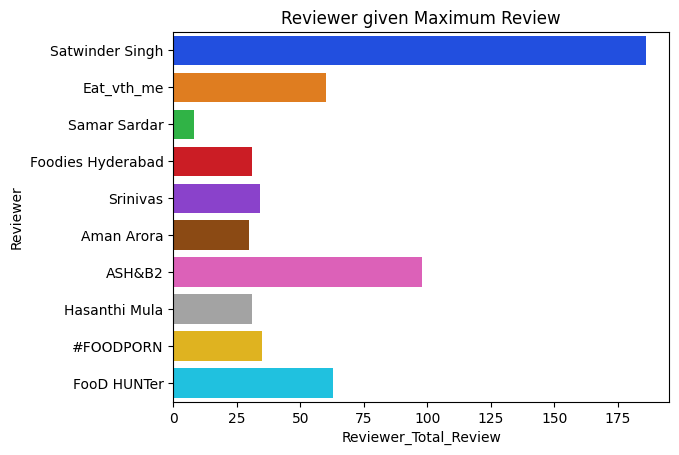

In [161]:
# Chart - 5 visualization code
#visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

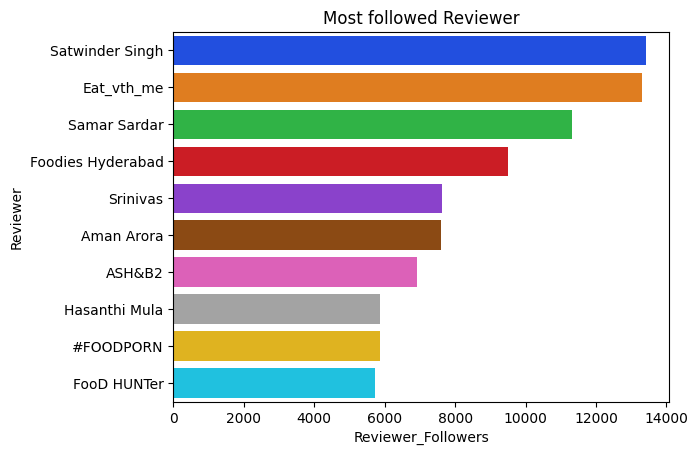

In [162]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the maximum reviews given by reviewer and review followers

##### 2. What is/are the insight(s) found from the chart?

satwinder singh, eat vth me and samar sardar are maxium reviwes given and the followers they have

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights help creating a positive business impact

#### Chart - 6

In [163]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

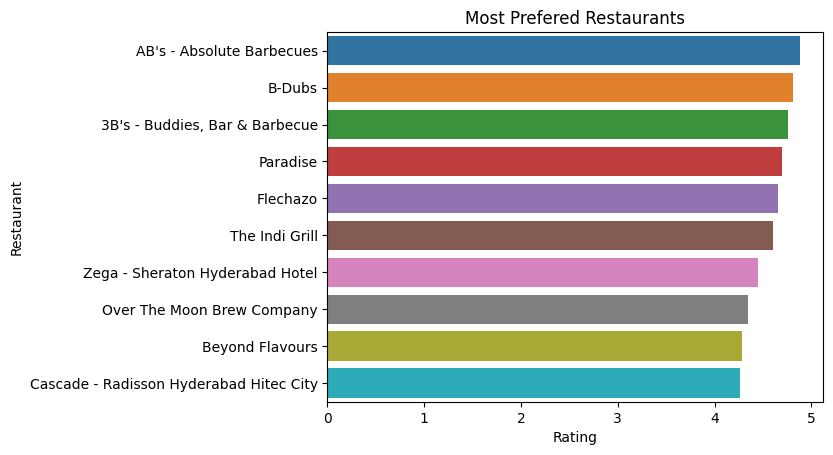

In [164]:
# Chart - 6 visualization code
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Prefered Restaurants')
plt.show()

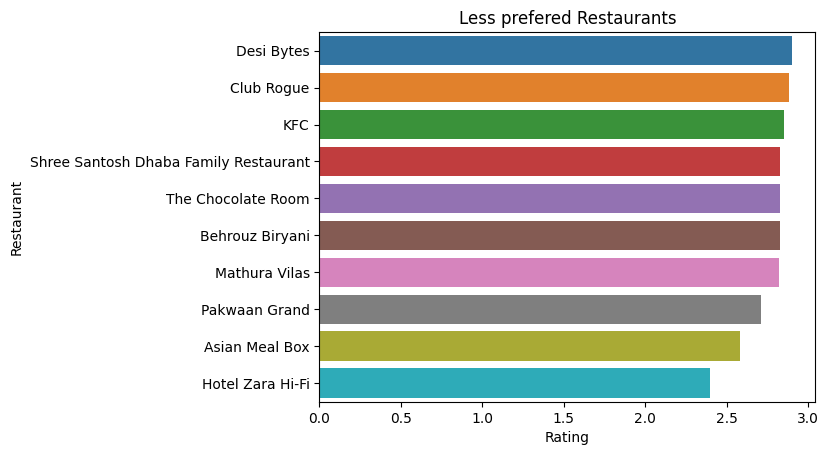

In [165]:
#chart for less liked restaurants
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less prefered Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the rating of top and bottom most rating restaurants

##### 2. What is/are the insight(s) found from the chart?

Absolute Barbecues,B-Dubs and Buddies bar & Barbecue are top rating restaurants and Hotel Zara Hi-Fi ,Asian Meal Box & pakwaan Grand and others has low rated restaurants

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it helps the business impact positive as well as negative

#### Chart - 7

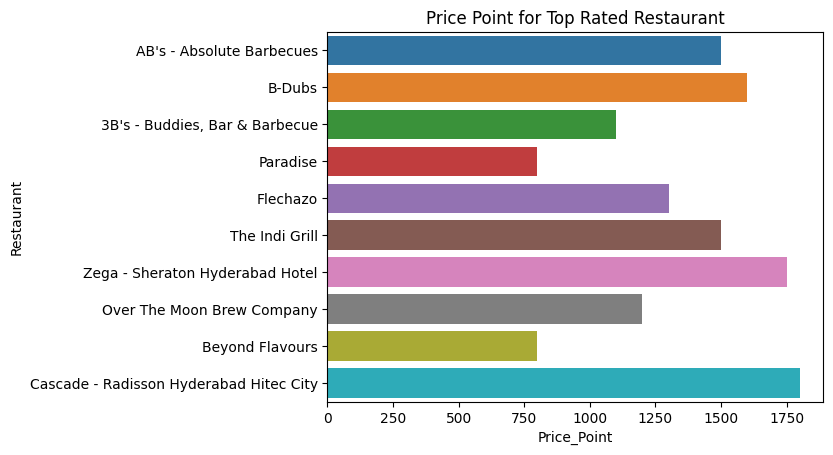

In [166]:
# Chart - 7 visualization code
sns.barplot(data = most_engaged_hotel[:10], x = 'Price_Point', y = 'Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

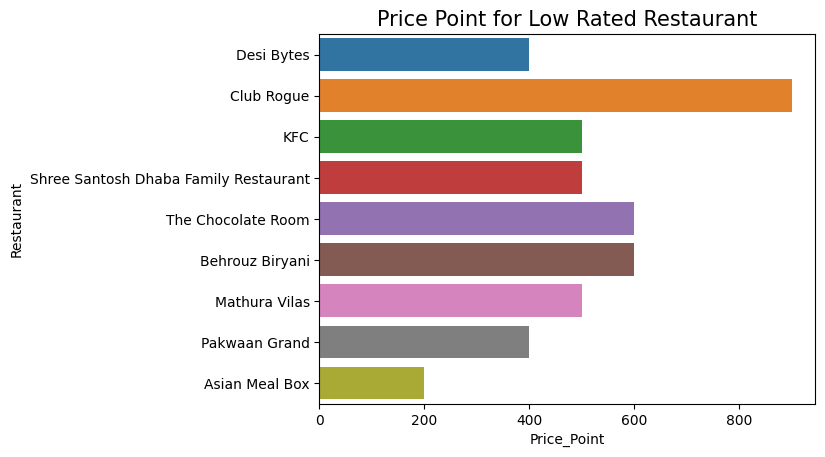

In [167]:
#visualization code for price point of low rated restaurant
sns.barplot(data = most_engaged_hotel[-10:-1], x = 'Price_Point',
            y = 'Restaurant')
plt.title('Price Point for Low Rated Restaurant', size = 15)
plt.show()

##### 1. Why did you pick the specific chart?

barplot helps compare the Top rated and low rated restaurants reviwe given by reviwers

##### 2. What is/are the insight(s) found from the chart?

Cascade-Radisson hyderabad hitec city,zega-sheraton hyderabad hotel,B-Dubs and Absolute Brbecue are top priced given by reviewers

Asian Meal Box ,pakwaan Grand and desi bytes are low priced

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes  the gained insights help creating a positive business impact



#### Chart - 8

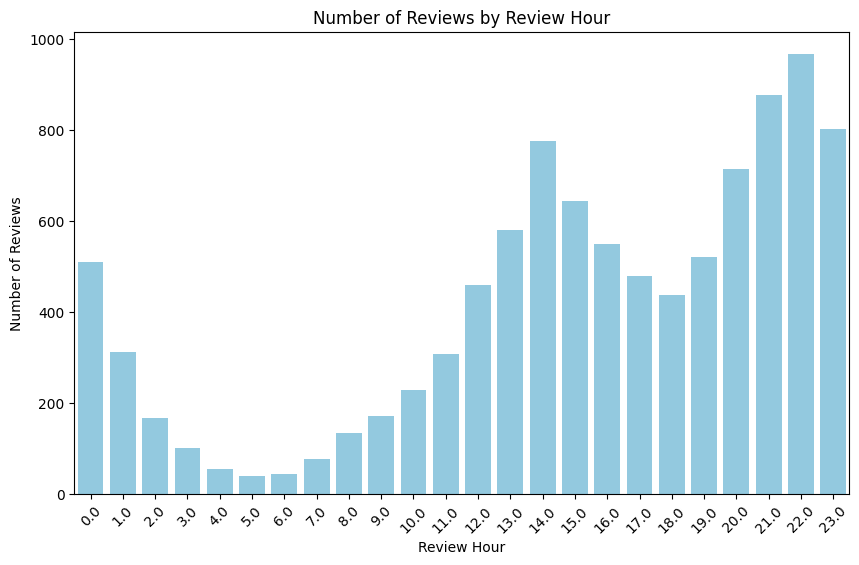

In [168]:
# Chart - 8 visualization code
review['Review_Hour'] = review['Review_Hour']

# Create a count plot to visualize the number of reviews by review hour
plt.figure(figsize=(10, 6))
sns.countplot(data=review, x='Review_Hour', color='skyblue')
plt.xlabel('Review Hour')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Review Hour')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the review hours

##### 2. What is/are the insight(s) found from the chart?

Most review given  time period is afternoon and night time hours

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the gained insights help creating a positive business impact

#### Chart - 9

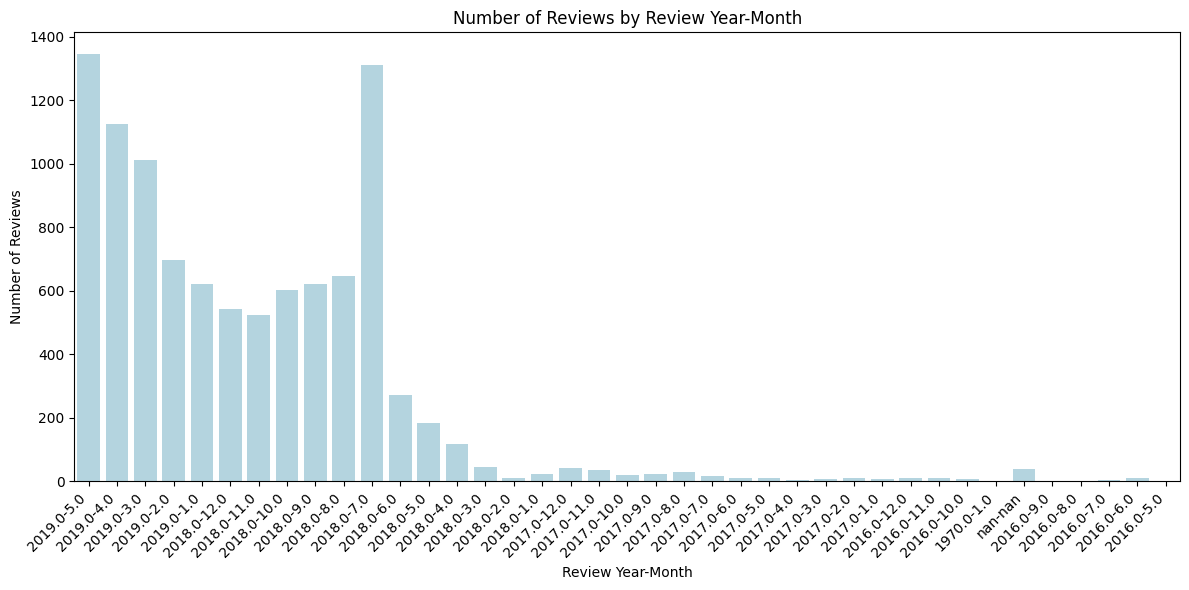

In [169]:
# Chart - 9 visualization code
# Convert the 'Review_Year' and 'Review_Month' columns to integers
review['Review_Year'] = review['Review_Year']
review['Review_Month'] = review['Review_Month']

# Combine 'Review_Year' and 'Review_Month' columns to create a new 'Year_Month' column
review['Year_Month'] = review['Review_Year'].astype(str) + '-' + review['Review_Month'].astype(str)

# Create a count plot to visualize the number of reviews by review month and year
plt.figure(figsize=(12, 6))
sns.countplot(data=review, x='Year_Month', color='lightblue')
plt.xlabel('Review Year-Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Review Year-Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps to compare the year and month wise reviews

##### 2. What is/are the insight(s) found from the chart?

2019-may ,2017-july and 2019-april are most reviewed year and months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insights help creating a positive business impact

#### Chart - 10

<ipython-input-170-017476cc3b4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85', fit = norm);
<ipython-input-170-017476cc3b4d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85', fit = norm);
<ipython-input-170-017476cc3b4d>:6: 

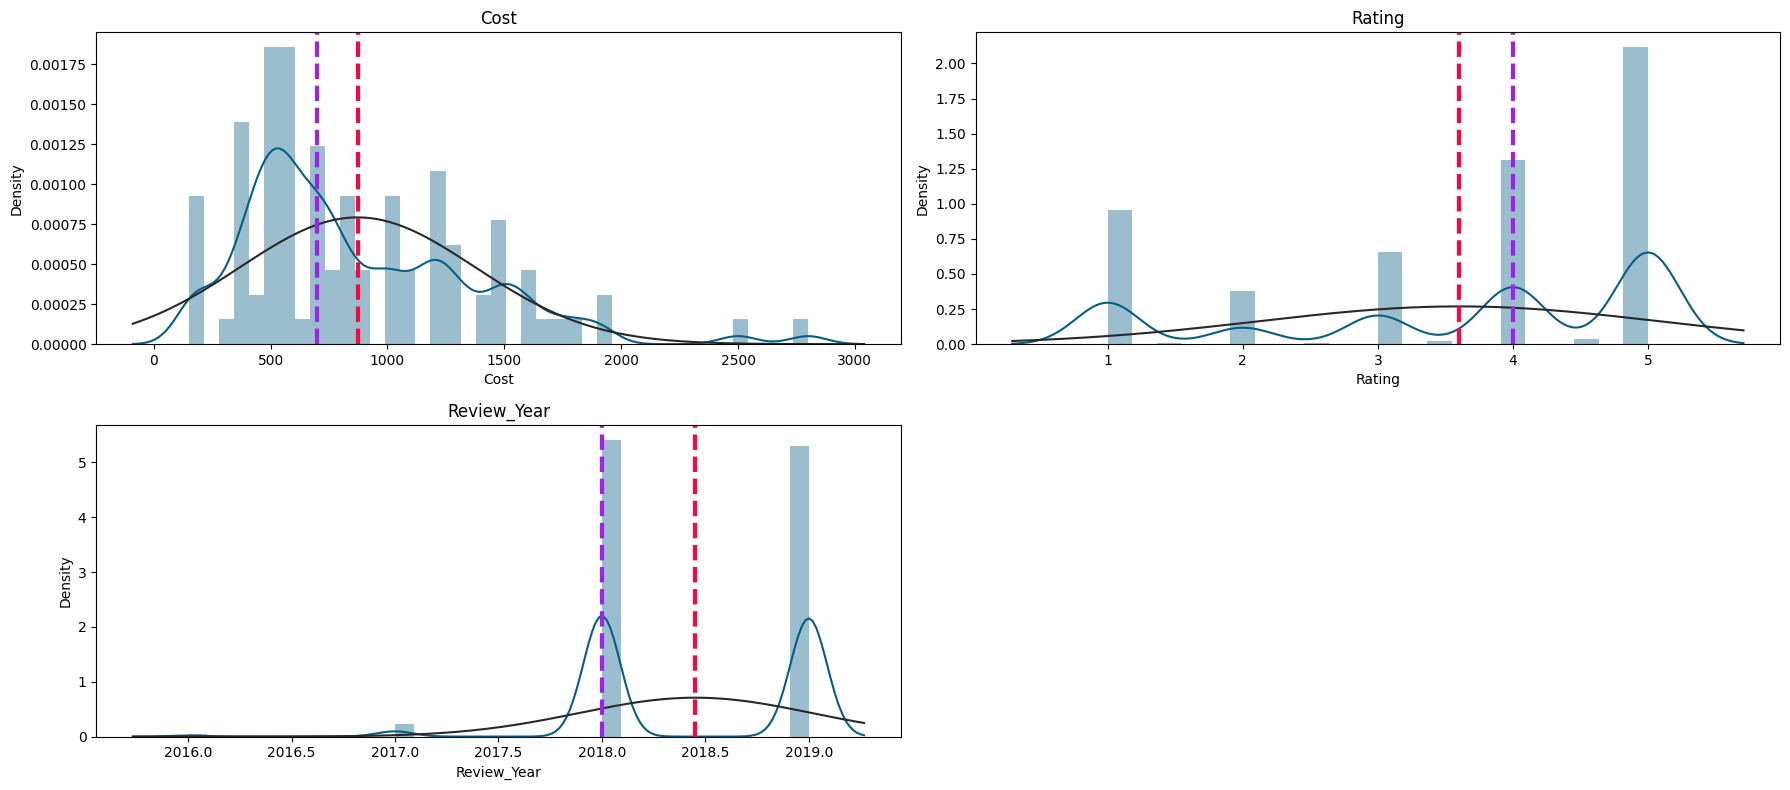

In [170]:
# Chart - 10 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85', fit = norm);
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.title(f'{col.title()}');
plt.tight_layout();
plt.show()

##### 1. Why did you pick the specific chart?

Distplot is used to create a histogram with mean and median of Cost ,Rating and Review Year

##### 2. What is/are the insight(s) found from the chart?

Cost and review year  indicates that the data is positively skewed. In a positively skewed distribution, the tail of the distribution extends towards the higher values, pulling the mean in that direction and resulting in a mean value that is greater than the median.

 Rating   indicates that the data is negatively skewed. In a negatively skewed distribution, the tail of the distribution extends towards the lower values, pulling the mean in that direction and resulting in a mean value that is less than the median.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes it helps the business impact

#### Chart - 11 - Correlation Heatmap

<ipython-input-171-09e35c77c1fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(),ax = ax, annot=True, cmap = 'viridis', linewidths = 1)


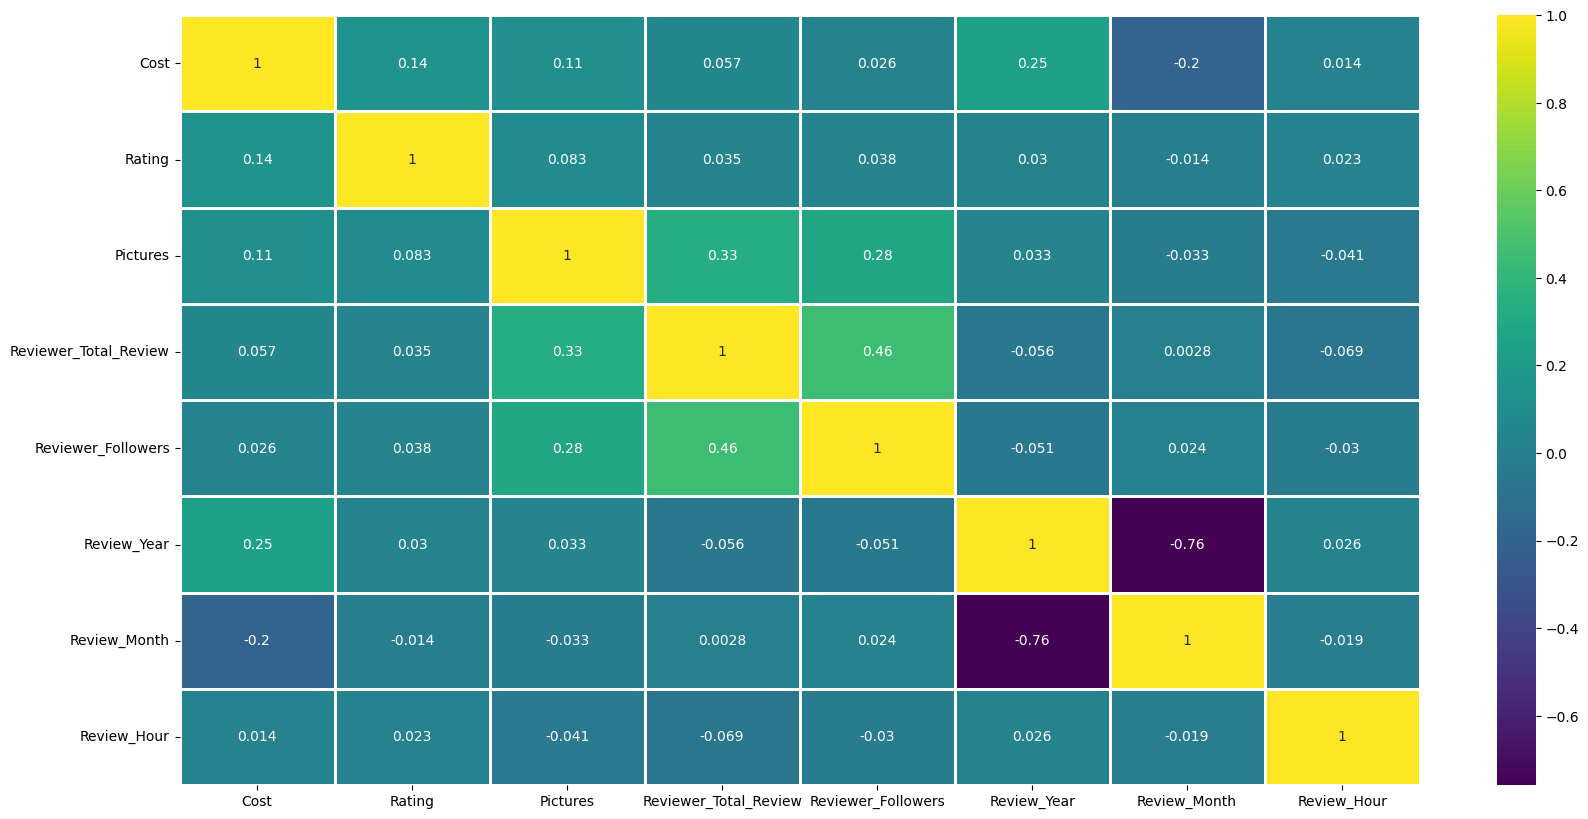

In [171]:
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged_df.corr(),ax = ax, annot=True, cmap = 'viridis', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

Heatmap is very useful for analysing correlation strength of multiple variables and its gives us the power of visualising strength of relation by colors darker colors tends to more relative and lighter are less relative.

##### 2. What is/are the insight(s) found from the chart?

 few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis_1:The cost of a restaurant is positively correlated with the rating it receives.

Hypothesis_2:Restaurants that are reviewed by reviewers with more followers will have a higher rating.

Hypothesis_3:Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [172]:
import statsmodels.formula.api as smf


# Check for missing values in the relevant columns
if 'Rating' not in merged_df.columns or 'Cost' not in merged_df.columns:
    raise ValueError("The 'Rating' and 'Cost' columns are required in the 'merged_df' DataFrame.")

# Drop rows with missing values in 'Rating' or 'Cost' (if necessary)
merged_df.dropna(subset=['Rating', 'Cost'], inplace=True)

# Fit the linear model
model = smf.ols(formula='Rating ~ Cost', data=merged_df).fit()

# Check p-value of the coefficient for 'Cost'
p_value = model.pvalues[1]

# Set the significance level (alpha)
alpha = 0.05

# Check if p-value is less than the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between the cost of a restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between the cost of a restaurant and the rating it receives.")


Reject Null Hypothesis: There is a significant relationship between the cost of a restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

 For testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable.

Based on the p-value obtained from the regression analysis, we will make a decision to either reject or fail to reject the null hypothesis. If we reject the null hypothesis, we can conclude that there is a statistically significant positive relationship between the cost of a restaurant and the rating it receives. If we fail to reject the null hypothesis, we do not have enough evidence to suggest that the cost has a significant impact on the rating

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Sperman correlation Test

#### 2. Perform an appropriate statistical test.

In [173]:
import scipy.stats as stats

# Perform the Spearman Rank Correlation test
correlation, p_value = stats.spearmanr(merged_df['Rating'], merged_df['Reviewer_Followers'])

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between 'Rating' and 'Reviewer_Followers'.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between 'Rating' and 'Reviewer_Followers'.")

Fail to reject Null Hypothesis: There is no significant relationship between 'Rating' and 'Reviewer_Followers'.


##### Which statistical test have you done to obtain P-Value?

I have used sperman correlation test

##### Why did you choose the specific statistical test?

Since we have an idea that these two doesn't look linearly correlated, so spearman correlation helps us to see whether the two variables covary; whether, as one variable increases, the other variable tends to increase or decrease.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [174]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Make sure 'merged' DataFrame contains 'Cuisines' and 'Rating' columns

# Check for missing values in the relevant columns
if 'Cuisines' not in merged_df.columns or 'Rating' not in merged_df.columns:
    raise ValueError("The 'Cuisines' and 'Rating' columns are required in the 'merged' DataFrame.")

# Drop rows with missing values in 'Cuisines' or 'Rating' (if necessary)
merged_df.dropna(subset=['Cuisines', 'Rating'], inplace=True)

# Create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
significance_level = 0.05
if p < significance_level:
    print("Reject Null Hypothesis: There is a significant relationship between 'Cuisines' and 'Rating'.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between 'Cuisines' and 'Rating'.")


Reject Null Hypothesis: There is a significant relationship between 'Cuisines' and 'Rating'.


##### Which statistical test have you done to obtain P-Value?

 I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

It is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [175]:
# Handling Missing Values & Missing Value Imputation

In [176]:
#Checking null values
resta_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [177]:
resta_df[resta_df['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [178]:
resta_df.fillna(resta_df.Timings.mode()[0], inplace = True)

In [179]:
mode_collection = resta_df['Collections'].mode()[0]
resta_df['Collections'].fillna(mode_collection, inplace=True)


In [180]:
#Final check for null values of restaurants
resta_df.isna().sum()

Restaurant     0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

In [181]:
#checking duplicate values of reviews
review.duplicated().sum()

36

In [182]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [183]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
Year_Month                  0
dtype: int64

In [184]:
#review.drop(index=7601, inplace=True)

In [185]:
#checking null reviewer
review[review['Reviewer'].isnull()]

#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [186]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [187]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
Year_Month               0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have checked the null values for restaurant data set and fill null values with mode for collection  and timing columns and check the duplicate values for review dataset and drop the duplicate values as well as null values for reviewer and reviewer total review columns

### 2. Handling Outliers

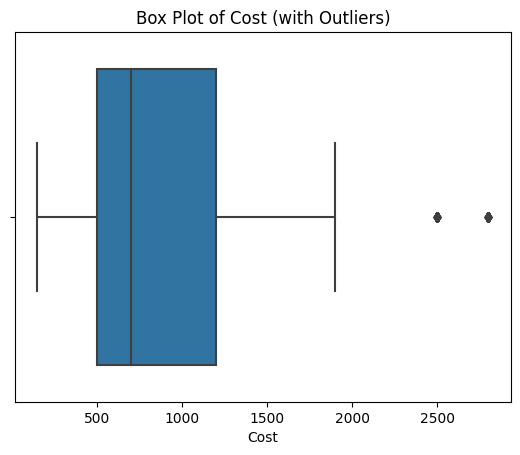

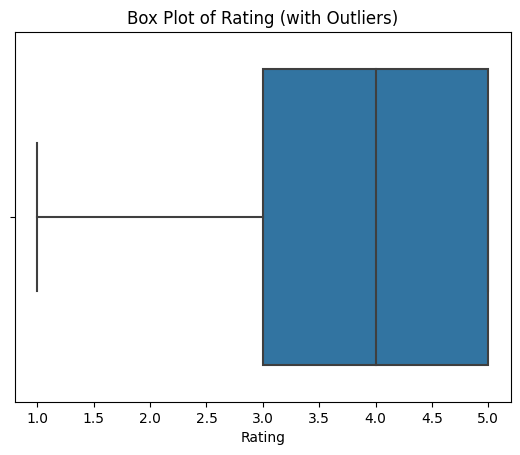

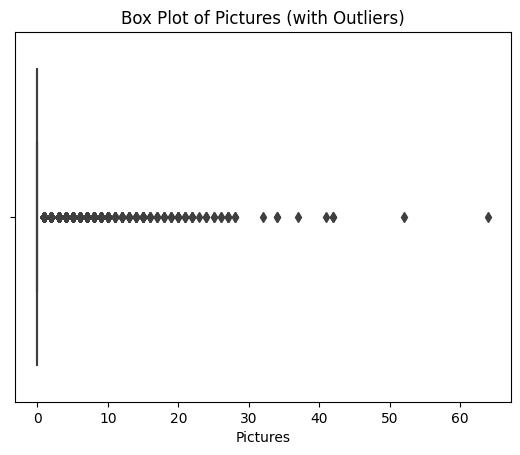

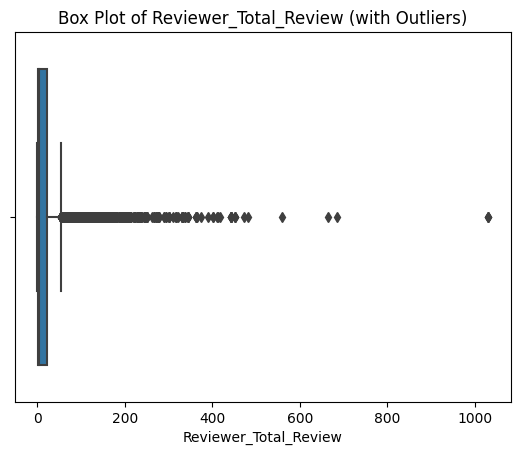

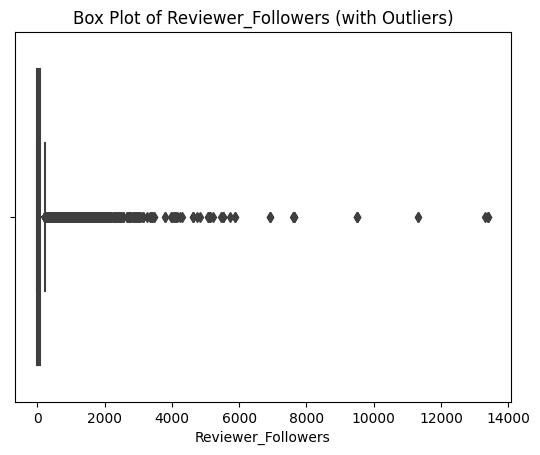

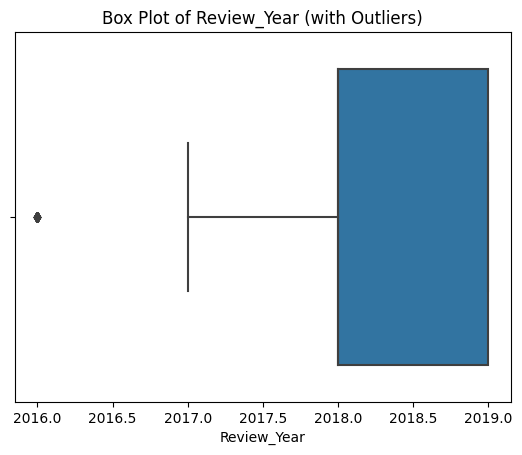

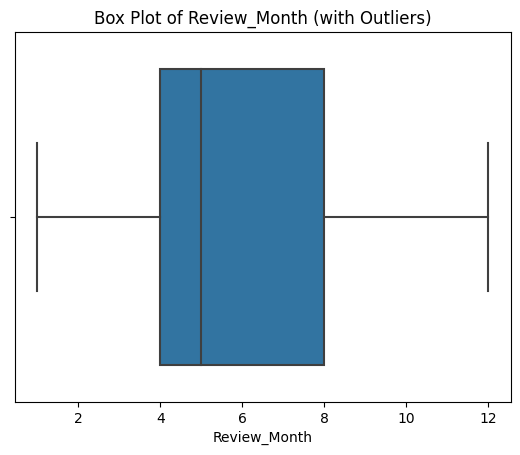

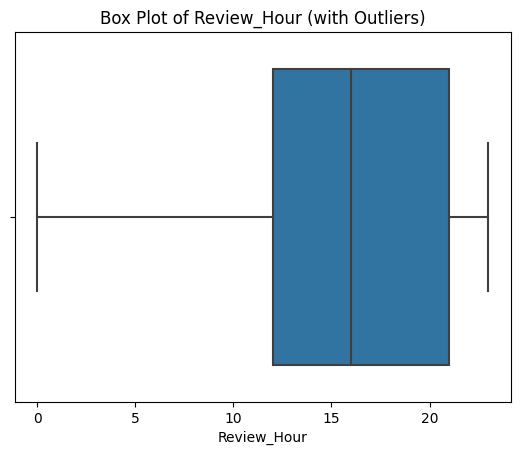

In [188]:
# Select numerical columns only (excluding non-numeric columns)
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# Loop through each numerical column and create a box plot to visualize outliers
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=merged_df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column} (with Outliers)')
    plt.show()


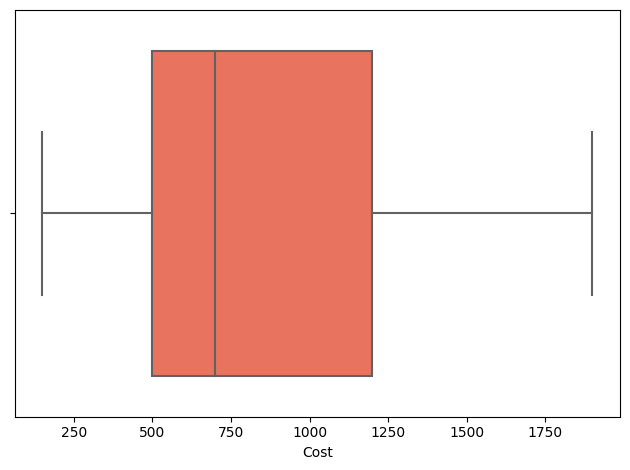

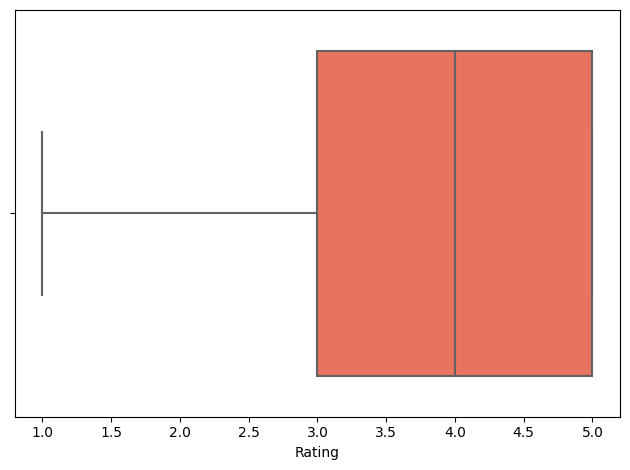

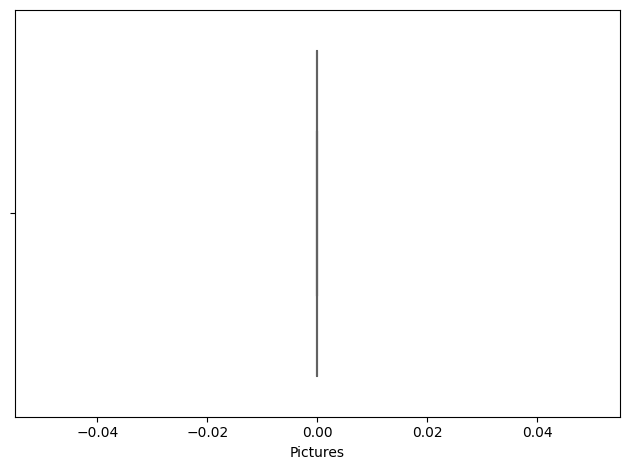

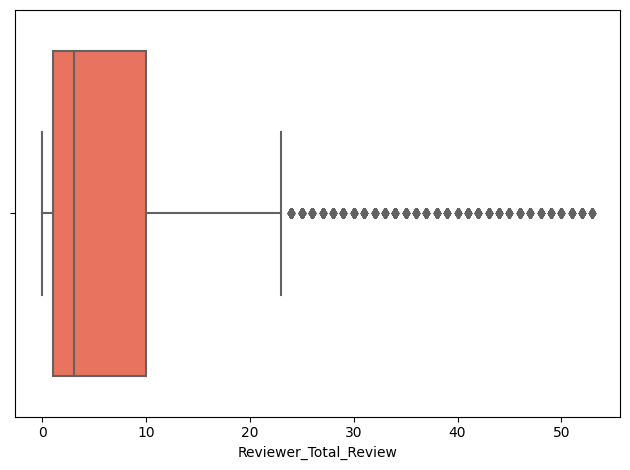

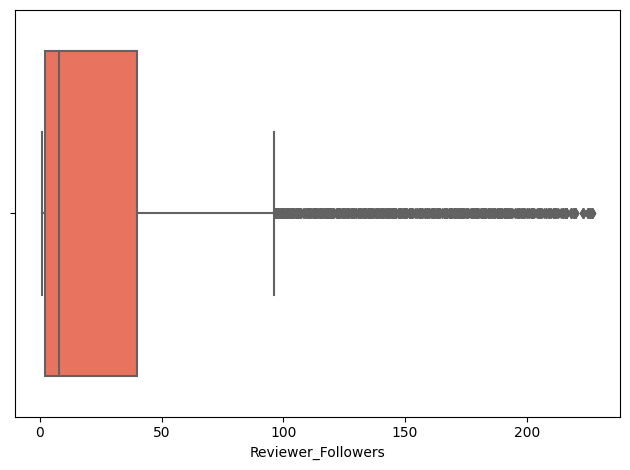

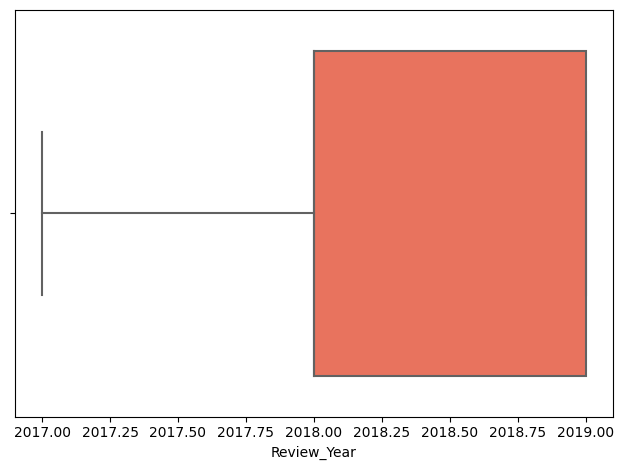

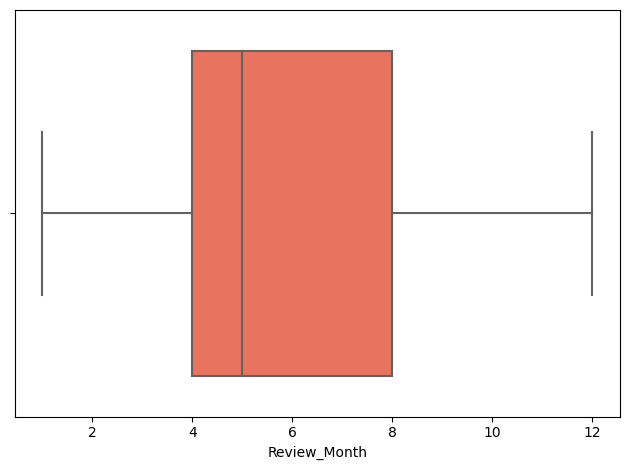

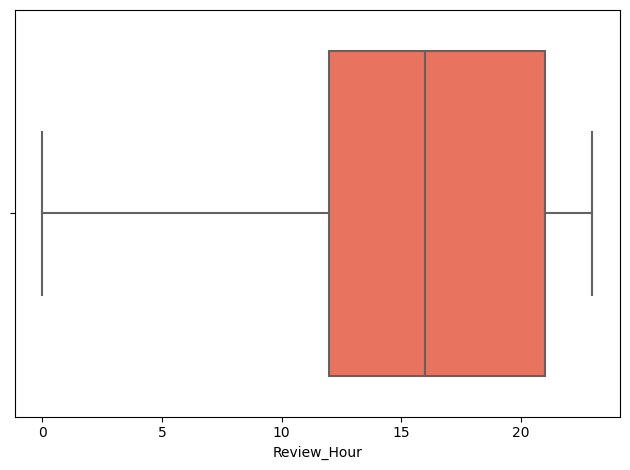

In [189]:
for i in numerical_columns:
    #plt.subplot(10, 4, 2)
    plt.xlabel('Distribution of {}'.format(i))

    # Calculate the IQR for the column
    Q1 = merged_df[i].quantile(0.25)
    Q3 = merged_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    filtered_data = merged_df[(merged_df[i] >= lower_bound) & (merged_df[i] <= upper_bound)]

    # Plot the boxplot without outliers
    sns.boxplot(x=i, data=filtered_data, color="tomato")

    #c += 1

    plt.tight_layout()
    plt.show()

In [190]:
# Handling Outliers & Outlier treatments

In [191]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
resta_df[(resta_df['Cost'] >= lower_bound) & (resta_df['Cost'] <= upper_bound)]

Empty DataFrame
Columns: [Restaurant, Links, Cost, Collections, Cuisines, Timings]
Index: []

In [192]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
review[(review['Reviewer_Followers']>= lower_bound) & (review['Reviewer_Followers'] <= upper_bound)]

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9964  Chinese Pavilion           Suhas Bhatt   
9972  Chinese Pavilion          Suvashri Dey   
9979  Chinese Pavilion        Ankush Agrawal   
9992  Chinese Pavilion            Sujay Garg   
9994  Chinese Pavilion  Shiladitya Chaudhury   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9964  Good ambience and presentation. Thai flavor is...     4.0   
9972  Liked the food, the Tom yum soup was okay. The...     4.0   
9979  The place has authentic Chinese food. We had s...     4.0   
9992  I visited this restaurant with friends and was...     5.0   
9994  Chinese Pavilion in Banjara HIlls was the firs...     1.5   

                       Metadata                Time  Pictures  \
0        1 Review , 2 Followers 2019-05-25 15:54:00       0.0   
1       3 Reviews , 2 Followers 2019-05-25 14:20:00       0.0   
2       2 Reviews , 3 Followers 2019-05-24 22:54:00       0.0   
3         1 Review , 1 Follower 2019-05-24 22:11:00       0.0   
4       3 Reviews , 2 Followers 2019-05-24 21:37:00       0.0   
...                         ...                 ...       ...   
9964     2 Reviews , 1 Follower 2017-03-26 21:53:00       0.0   
9972   14 Reviews , 5 Followers 2017-01-09 12:47:00       0.0   
9979  12 Reviews , 17 Followers 2016-11-04 19:58:00       0.0   
9992     4 Reviews , 1 Follower 2016-06-15 00:04:00       0.0   
9994    6 Reviews , 3 Followers 2016-06-05 10:49:00       0.0   

      Reviewer_Total_Review  Reviewer_Followers  Review_Year  Review_Month  \
0                       1.0                 2.0       2019.0           5.0   
1                       3.0                 2.0       2019.0           5.0   
2                       2.0                 3.0       2019.0           5.0   
3                       1.0                 1.0       2019.0           5.0   
4                       3.0                 2.0       2019.0           5.0   
...                     ...                 ...          ...           ...   
9964                    2.0                 1.0       2017.0           3.0   
9972                   14.0                 5.0       2017.0           1.0   
9979                   12.0                17.0       2016.0          11.0   
9992                    4.0                 1.0       2016.0           6.0   
9994                    6.0                 3.0       2016.0           6.0   

      Review_Hour   Year_Month  
0            15.0   2019.0-5.0  
1            14.0   2019.0-5.0  
2            22.0   2019.0-5.0  
3            22.0   2019.0-5.0  
4            21.0   2019.0-5.0  
...           ...          ...  
9964         21.0   2017.0-3.0  
9972         12.0   2017.0-1.0  
9979         19.0  2016.0-11.0  
9992          0.0   2016.0-6.0  
9994         10.0   2016.0-6.0  

[6790 rows x 13 columns]

##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) is a measure of statistical dispersion that represents the range of the middle 50% of the data in a dataset. It is used to summarize the spread or variability of a dataset, especially in the presence of outliers.

### 3. Categorical Encoding

In [193]:
# Encode your categorical columns

# getting only necessary features for Clustering
cluster_df = pd.merge(resta_df, price_point, how='right',
                      on='Restaurant')[['Restaurant', 'Cost', 'Rating', 'Cuisines']]

# Encoding the Cuisines as columns to further use in clustering

#splitting cuisines into a list
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.split(', '))

# adding the number of cuisines another feature
cluster_df['no_of_cuisines'] = cluster_df['Cuisines'].apply(lambda x: len(x))


# Create a list of all unique cuisines
all_cuisines = list(set([cuisine for cuisines in cluster_df['Cuisines'] for cuisine in cuisines]))

# Create a DataFrame with a column for each unique cuisine
cuisine_df = pd.DataFrame(columns=all_cuisines)

# Loop over each restaurant and create a feature vector
for i, row in cluster_df.iterrows():
    feature_vec = {cuisine: 0 for cuisine in all_cuisines}
    for cuisine in row['Cuisines']:
        feature_vec[cuisine] += 1
    cuisine_df.loc[i] = feature_vec

# Concatenate the original DataFrame with the cuisine DataFrame
cluster_df = pd.concat([cluster_df, cuisine_df], axis=1)

In [194]:
cluster_org_df = cluster_df.copy()

In [195]:
cluster_df.head()

Restaurant  Cost  Rating  \
0               10 Downing Street  1900    3.80   
1                        13 Dhaba   450    3.48   
2  3B's - Buddies, Bar & Barbecue  1100    4.76   
3       AB's - Absolute Barbecues  1500    4.88   
4               Absolute Sizzlers   750    3.62   

                                  Cuisines  no_of_cuisines  Mughlai  Andhra  \
0     [North Indian, Chinese, Continental]               3        0       0   
1                           [North Indian]               1        0       0   
2  [North Indian, Mediterranean, European]               3        0       0   
3  [European, Mediterranean, North Indian]               3        0       0   
4         [Continental, American, Chinese]               3        0       0   

   Mexican  European  Beverages  ...  Indonesian  Chinese  Momos  Italian  \
0        0         0          0  ...           0        1      0        0   
1        0         0          0  ...           0        0      0        0   
2        0         1          0  ...           0        0      0        0   
3        0         1          0  ...           0        0      0        0   
4        0         0          0  ...           0        1      0        0   

   Sushi  Goan  Continental  Wraps  Pizza  BBQ  
0      0     0            1      0      0    0  
1      0     0            0      0      0    0  
2      0     0            0      0      0    0  
3      0     0            0      0      0    0  
4      0     0            1      0      0    0  

[5 rows x 47 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I used technique similar to One Hot Encoding or count vectorization, I have converted cuisines as features and their counts in the values for each restaurants to execute unsupervised clustering in the data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [196]:
# Expand Contraction

In [272]:
!pip install contractions

In [198]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

Reviewer                             Restaurant  Rating  \
7461        Soumi Mukherjee                                 Faasos     3.0   
6716  Sekharamantri Snigdha  Yum Yum Tree - The Arabian Food Court     5.0   

                                                 Review  
7461  I hace tried faasos a multiple times. I got tw...  
6716  Best place for all mandi fans. Nevwr miss thei...

In [199]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [200]:
sentiment_df.sample(2)

index       Reviewer           Restaurant  Rating  \
1624   1624     Akash Dudi  NorFest - The Dhaba     4.0   
4950   4950  Neetika Sahai        Mathura Vilas     2.0   

                                                 Review  
1624  Food was very tasty but a bit costly.specially...  
4950  I have been to this place for random dinner wi...

In [201]:
import contractions

# Assuming sentiment_df is your DataFrame with 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

# Print the updated DataFrame to see the changes
print(sentiment_df)

      index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9956   9956      Abhishek Mahajan  Chinese Pavilion     3.0   
9957   9957        Sharad Agrawal  Chinese Pavilion     4.5   
9958   9958             Ramandeep  Chinese Pavilion     1.5   
9959   9959       Nayana Shanbhag  Chinese Pavilion     4.0   
9960   9960      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     The ambience was good, food was quite good . h...  
1     Ambience is too good for a pleasant evening. S...  
2     A must try.. great food great ambience. Thnx f...  
3     Soume

#### 2. Lower Casing

In [202]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  the ambience was good, food was quite good . h...  
1  ambience is too good for a pleasant evening. s...  
2  a must try.. great food great ambience. thnx f...  
3  soumen das and arun was a great guy. only beca...  
4  food is good.we ordered kodi drumsticks and ba...

#### 3. Removing Punctuations

In [203]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [204]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

index              Reviewer          Restaurant  Rating  \
9634   9634       Avinash Tummala   Hyderabadi Daawat     4.0   
6016   6016  Chandra Sekhar Reddy          PourHouse7     2.0   
3383   3383             Raj Kumar          Club Rogue     4.0   
8647   8647         Prasant Sekar  The Chocolate Room     4.0   
7932   7932          Naveen Kumar        Olive Garden     3.0   

                                                 Review  
9634  visited this place today we ordered murgh kalm...  
6016  place and music was good food was tasteless no...  
3383  the ambience of the club is really nice the st...  
8647  it is just like the other chocolate room outle...  
7932  have been here many times i was a frequent at ...

#### 4. Removing URLs & Removing words and digits contain digits.

In [205]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [206]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
resta_df['Location'] = resta_df['Links'].apply(get_location)
resta_df.sample(2)

Restaurant                                              Links  \
49        Mathura Vilas  https://www.zomato.com/hyderabad/mathura-vilas...   
87  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   

    Cost                                  Collections  \
49   500             Veggie Friendly, Terrific Thalis   
87   600  Food Hygiene Rated Restaurants in Hyderabad   

                               Cuisines  \
49  South Indian, North Indian, Chinese   
87   American, Fast Food, Salad, Burger   

                                     Timings   Location  
49  11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM  hyderabad  
87                           12 Noon to 4 AM  hyderabad

#### 5. Removing Stopwords & Removing White spaces

In [207]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')


In [208]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [209]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [210]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [211]:
#random sample
sentiment_df.sample(2)

index          Reviewer         Restaurant  Rating  \
2074   2074       Nishi Kohli           13 Dhaba     5.0   
1872   1872  Deepanshu Mittal  10 Downing Street     1.0   

                                                 Review  
2074  far best aalo paranthas ever hyderabad righly ...  
1872  rude staff ask corporate discount ask cancel r...

#### 6. Rephrase Text

In [212]:
# Rephrase Text

#### 7. Tokenization

In [213]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

#### 8. Text Normalization

In [214]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.sample(2)

index     Reviewer                             Restaurant  Rating  \
6733   6733  Shyam Kumar  Yum Yum Tree - The Arabian Food Court     5.0   
2411   2411   DNiharikaa                                  SKYHY     4.0   

                                                 Review  
6733  [good, sitting, dessert, awesome, good, time, ...  
2411  [one, good, open, terase, place, town, food, g...

##### Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

#### 9. Part of speech tagging

In [215]:
# POS Taging

#### 10. Text Vectorization

In [216]:
# Vectorizing Text

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### Which text vectorization technique have you used and why?

 I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [217]:
# Manipulate Features to minimize feature correlation and create new features

In [218]:
#columns for dataset
resta_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Location'],
      dtype='object')

In [219]:
#dropping columns
resta_df = resta_df.drop(columns = ['Links','Location'], axis = 1)

In [220]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [221]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour', 'Year_Month'],
      dtype='object')

In [222]:
#For sentiment analysis
# Create a new column for sentiment based on the ratings
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(classify_sentiment)

#### 2. Feature Selection

In [223]:
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review Sentiment  
0  [ambience, good, food, quite, good, saturday, ...  Positive  
1  [ambience, good, pleasant, evening, service, p...  Positive  
2  [must, try, great, food, great, ambience, thnx...  Positive  
3  [soumen, da, arun, great, guy, behavior, since...  Positive  
4  [food, goodwe, ordered, kodi, drumstick, baske...  Positive

In [224]:
# Select your features wisely to avoid overfitting

# From analysis df, keeping only required features for final input
sentiment_df = sentiment_df[['Restaurant', 'Review', 'Rating', 'Sentiment']]

##### What all feature selection methods have you used  and why?

We are going to use Principal Component Analysis (PCA) for feature selection, in the Clustering problems we have to deal with dimensionalty problem with features.

##### Which all features you found important and why?

for the Restaurant Clustering, we find that 'Cuisines', 'Cost', 'Rating' as important feature to perform clustering. and for the Topic modeling from Reviews data, we have selected reviews text data and converted that to tfidf vectors.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [225]:
# Transform Your data

cluster_df['Cost'] = np.log(cluster_df['Cost']) # tranfomed Cost

Transforming features, such as log transforming right-skewed data, is done to improve the performance and interpretability of machine learning models, particularly when dealing with skewed or non-normal data. moreover other numerical features does follow symmetric distribution of data.

### 6. Data Scaling

In [226]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
numerical_vars = ['Cost', 'Rating', 'no_of_cuisines']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
cluster_df[numerical_vars] = scaler.fit_transform(cluster_df[numerical_vars])

##### Which method have you used to scale you data and why?

I've used Standard Scaler, these variables have different scales and ranges, which can affect the results of clustering. For example, the cost of a meal can be a much larger number than the rating, and this can cause the clustering algorithm to give more weight to the cost variable in the clustering process.

By standardizing the numerical variables, we put them on the same scale and range, which ensures that each variable contributes equally to the clustering process. This makes the clustering results more reliable and interpretable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving as much of the relevant information as possible. It is a technique used to overcome the curse of dimensionality, which refers to the problem of increased computational complexity and decreased performance of machine learning models as the number of features increases.

So that the Dimensionality reduction is needed because the countvectorization technique creates neumerious number of features that are used in clustering and to working with huge amount of features impact our performance and resources.

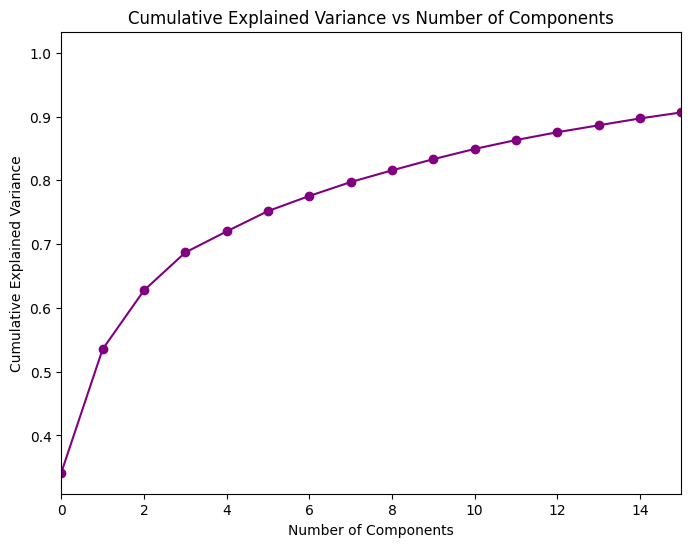

In [250]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

pca = PCA()

# Fit the PCA object to your standardized data
pca.fit(cluster_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])


plt.show()


In [251]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(cluster_df)

# transform data to principal component space
pca_df = pca.transform(cluster_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

Cumulative variance explained by 3 principal components: 0.6273416878247278


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis technique. PCA is a commonly used unsupervised technique for reducing the dimensionality of high-dimensional datasets while retaining most of the variation present in the original data.

PCA is a suitable technique in this case because you have more than 40 features, and using all of them for clustering may result in a high-dimensional space that can make it challenging to visualize and analyze the data. PCA reduces the dimensionality of the data by transforming the original features into a new set of orthogonal features that represent the most important patterns in the data. These new features, called principal components, are ordered by the amount of variance they explain in the original data.

### 8. Data Splitting

In [229]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Not Required

The train-test split is a technique for evaluating the performance of a machine learning algorithm. primary used for classification or regression problems and can be used for any supervised learning algorithm. Since This is an Unsuopervised ML problem and we dont require an a validation data, we are not going to use this.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Problem of Imbalance data is often occur on ML Classification problems where we deal with target variable and this is an Unsupervised problem, without any target variables so we dont have to deal with imbalance problems.



In [230]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not Needed

## ***7. ML Model Implementation***

### ML Model - 1

In [252]:
#importing kmeans
from sklearn.cluster import KMeans

#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(pca_df)
    wcss.append(km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

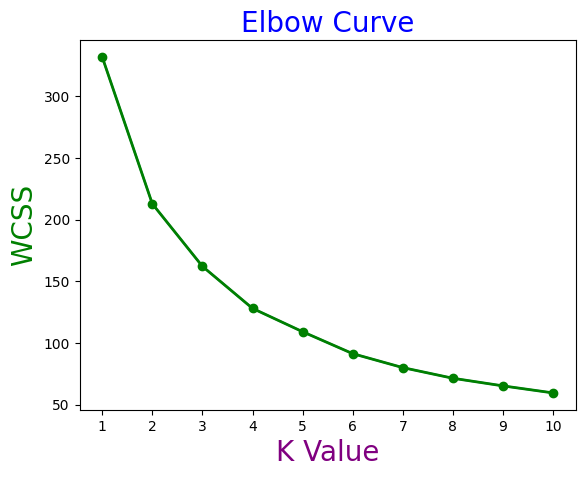

In [253]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="Green", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

For n_clusters = 2 average silhouette_score is : 0.31236284136926323
For n_clusters = 3 average silhouette_score is : 0.29664412268173895


<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (2).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

For n_clusters = 4 average silhouette_score is : 0.3117021172156011


<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (2).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (3).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This beha

For n_clusters = 5 average silhouette_score is : 0.2984975731688124
For n_clusters = 6 average silhouette_score is : 0.3129758046408572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (2).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2

For n_clusters = 7 average silhouette_score is : 0.3225227267405106
For n_clusters = 8 average silhouette_score is : 0.30769812423554216


<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (0).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (1).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (2).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(c[0], c[1], marker=i, alpha=1,
<ipython-input-254-b07fdbd02f14>:83: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker (3).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This beha

For n_clusters = 9 average silhouette_score is : 0.30337394731990175


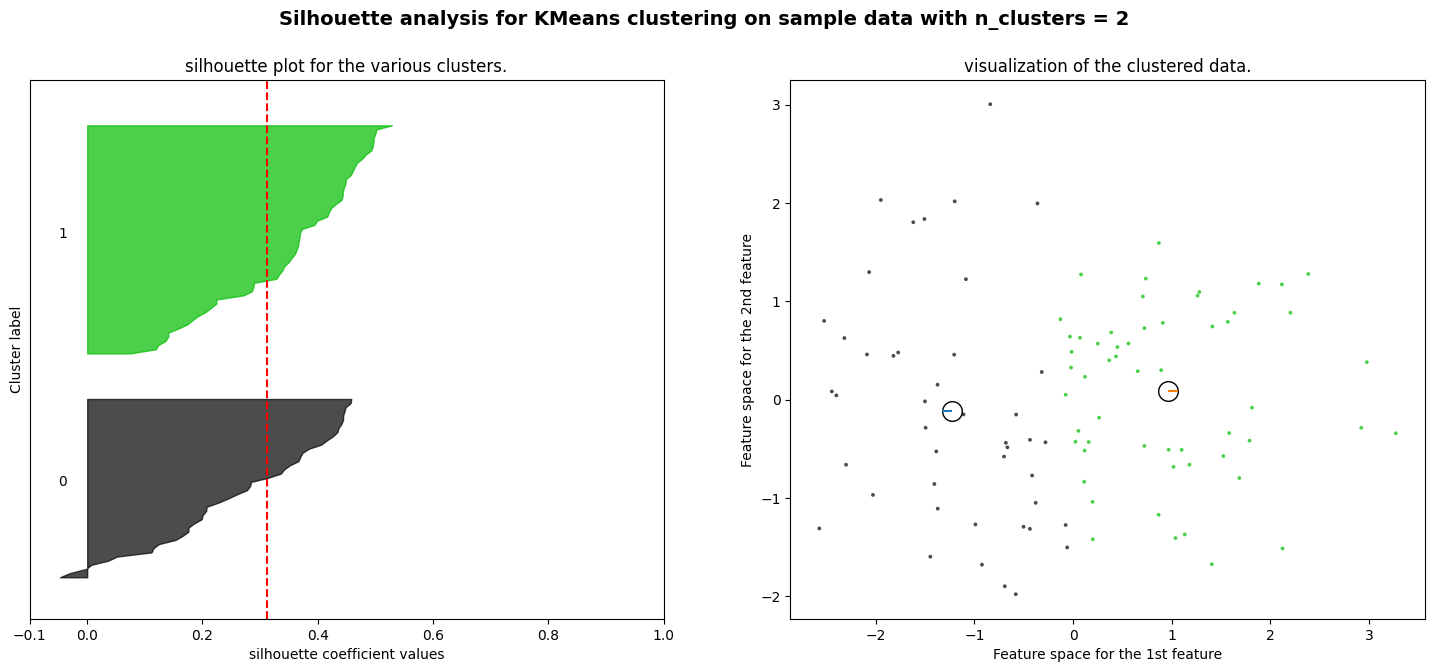

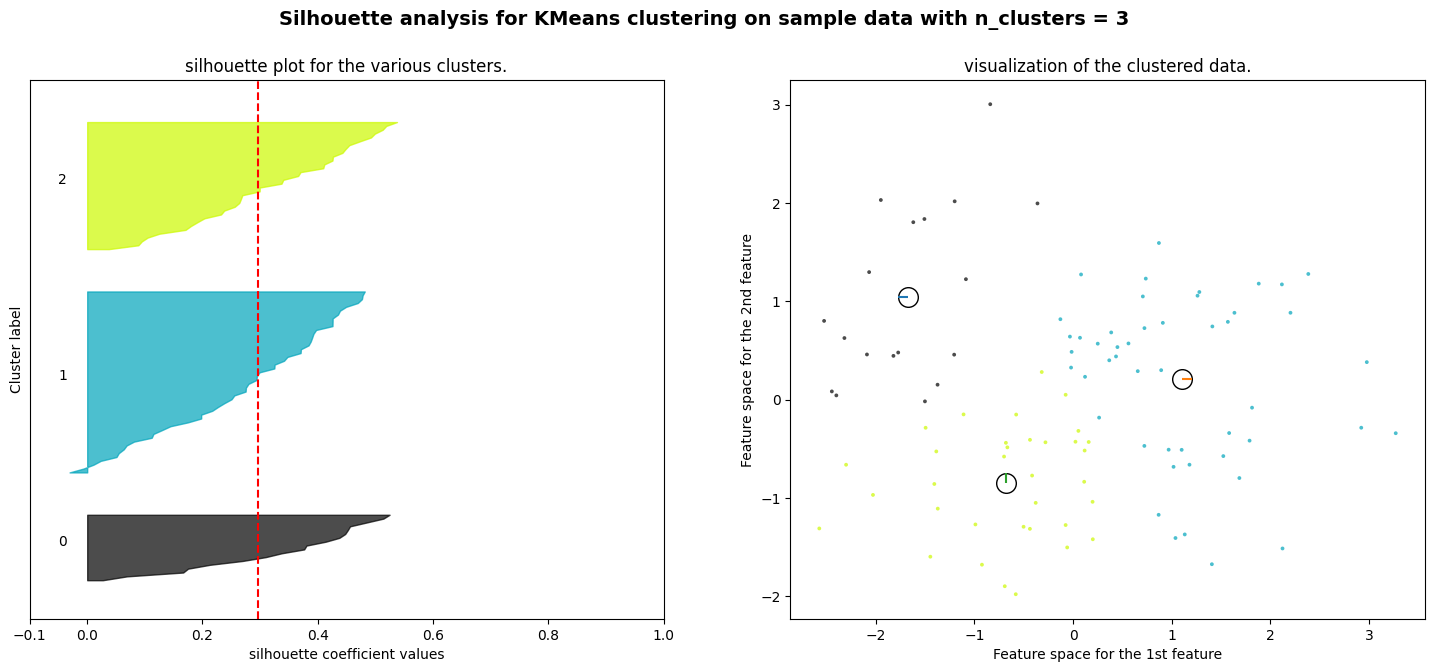

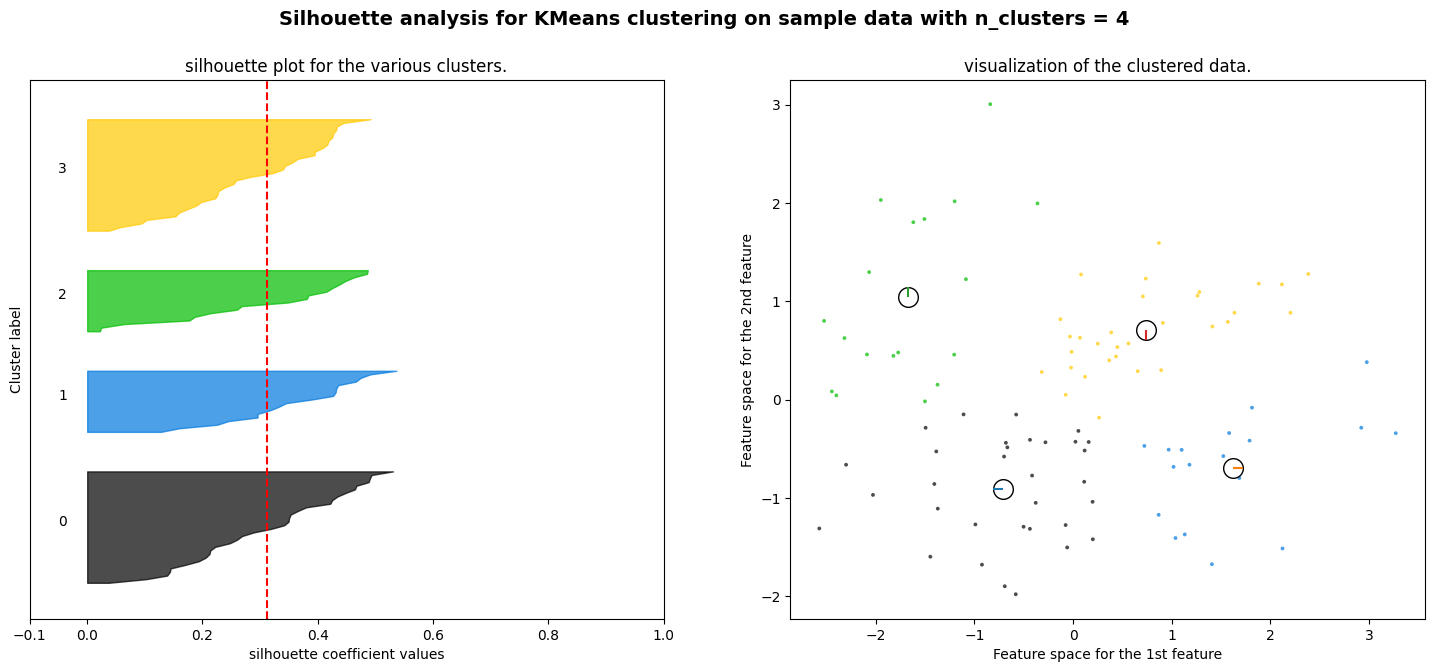

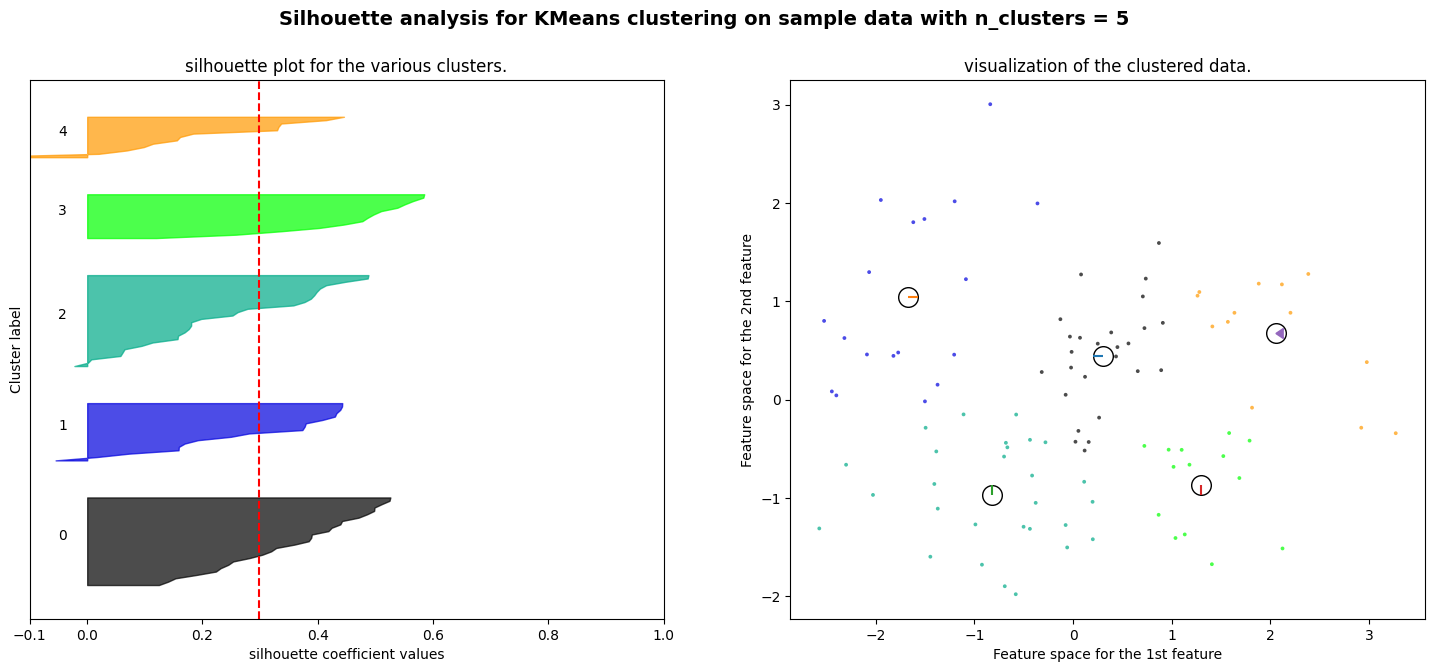

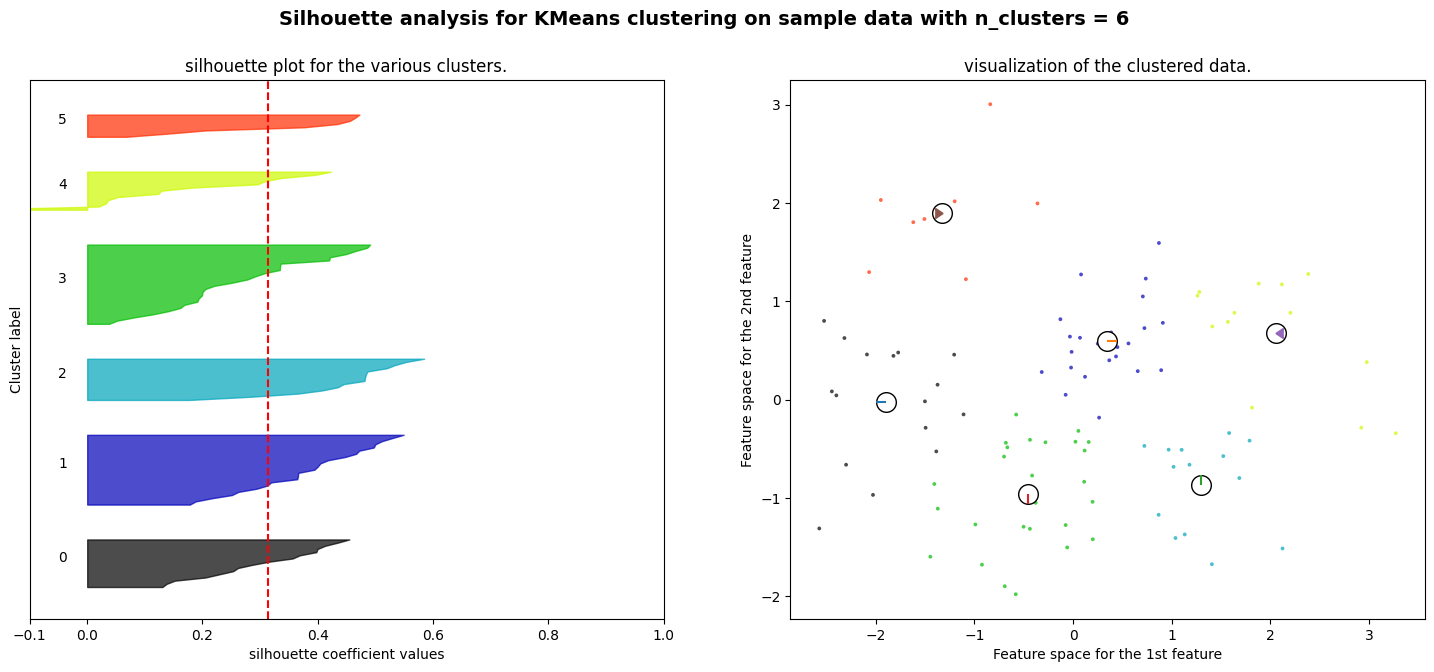

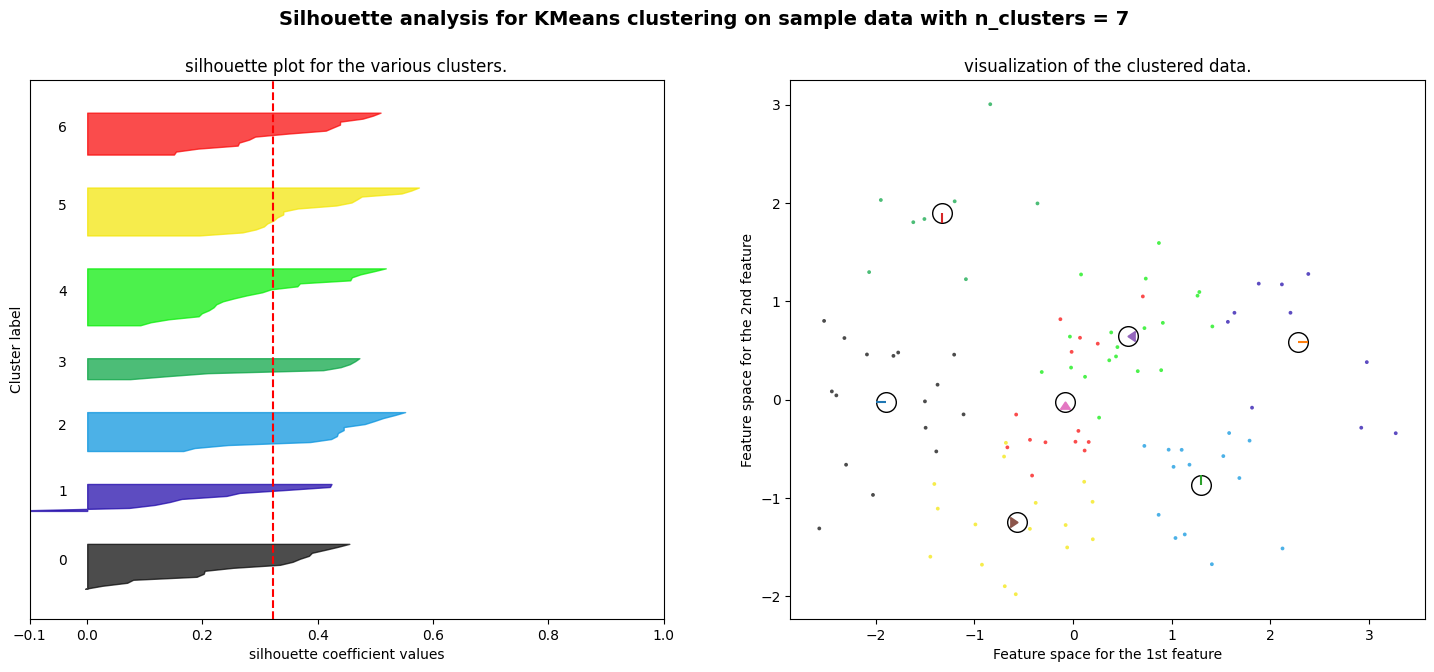

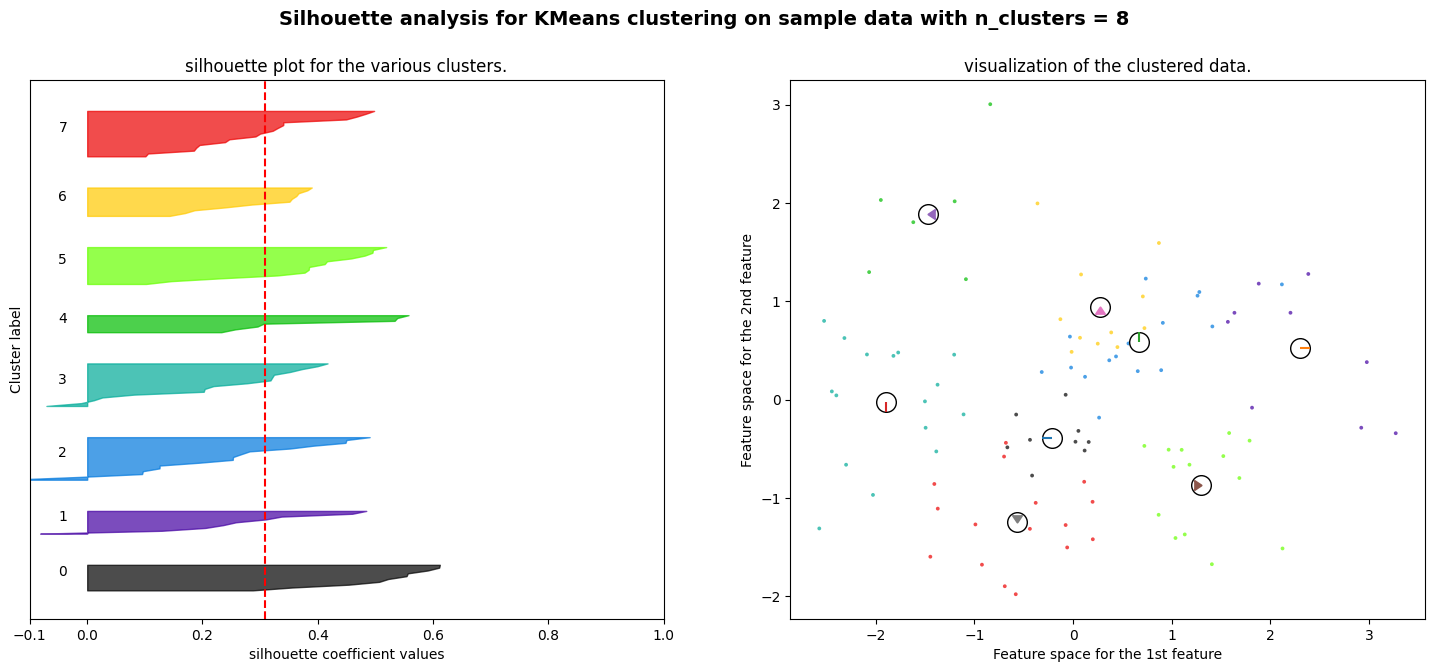

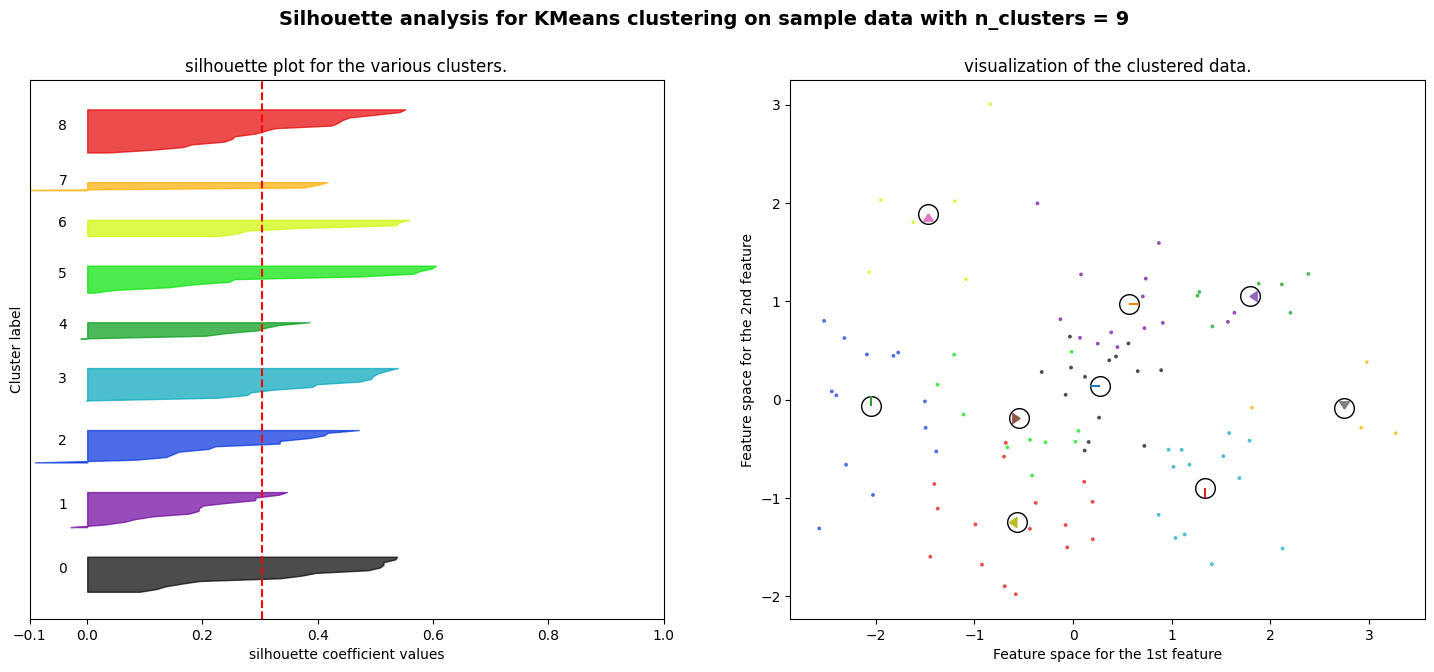

In [254]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

K-means is a clustering algorithm that is commonly used in machine learning to partition data into groups or clusters based on similarities between data points. It works by grouping data points that are closest to each other in a multi-dimensional space.

k-means clustering was applied to dataset containing information on restaurants including their cuisine, ratings, and cost. The model was used to cluster the restaurants into groups based on these features.

Silhouette score is a metric used to evaluate the quality of clustering results. It measures the distance between each data point in a cluster to the other points in the same cluster compared to the distance between that point and the points in the nearest neighboring cluster. The score ranges from -1 to 1, with values closer to 1 indicating better-defined clusters.

The performance of the model was evaluated using the silhouette score metric, which measures how well-separated the clusters are. The silhouette score for this model was approximately 0.31, which suggests that the clusters are somewhat distinct.

To interpret the silhouette visualizer graph, we should look for the following:

High average silhouette score: The optimal number of clusters will have a high average silhouette score, indicating that the clusters are well-separated and the data points are well-matched to their assigned clusters.

Even cluster sizes: The clusters should have roughly equal numbers of data points, which will be represented by bars of similar width.

No overlapping clusters: There should be no overlapping bars, which would indicate that the clustering is suboptimal.

No negative scores: Negative silhouett

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


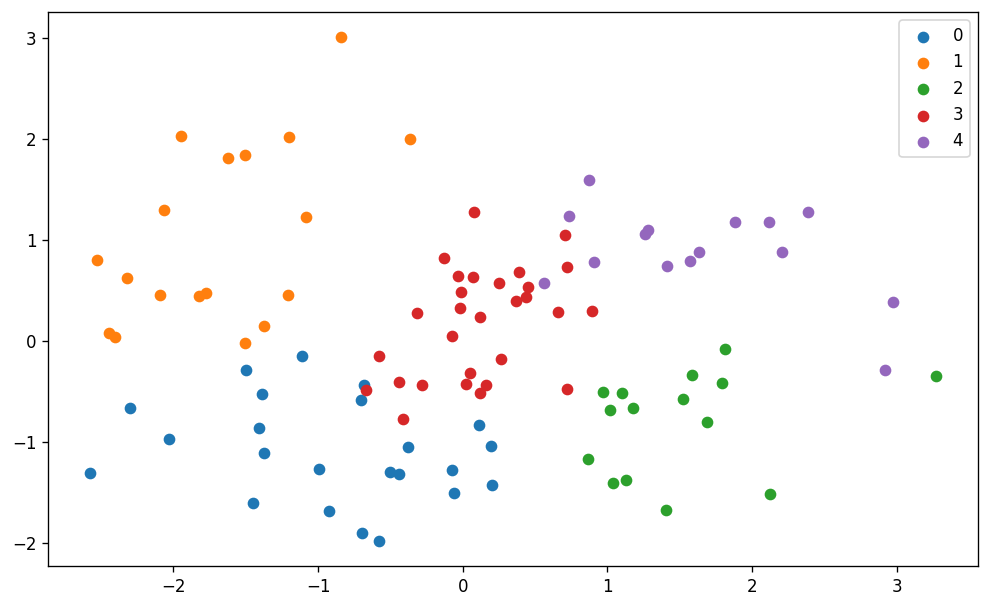

In [255]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(pca_df)

#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()

K-means and hierarchical clustering are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

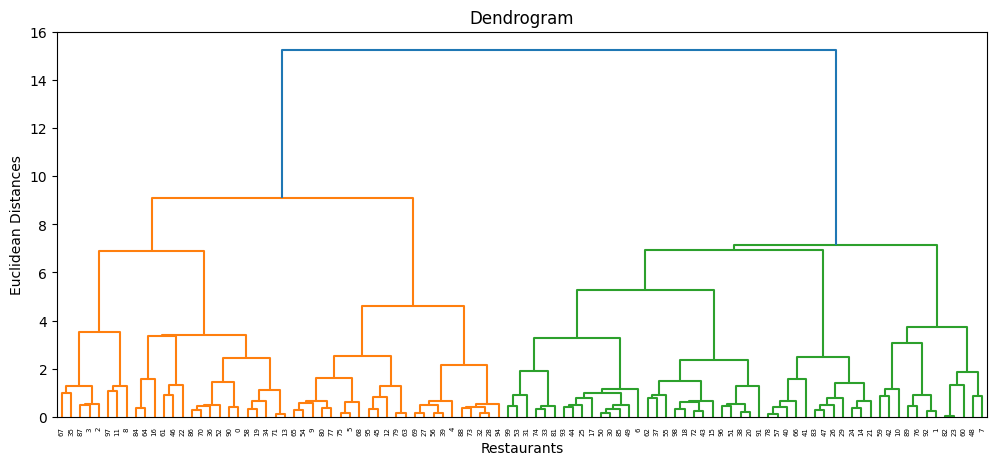

In [256]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(pca_df, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.grid(False)
plt.show()


# Aglomerative Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

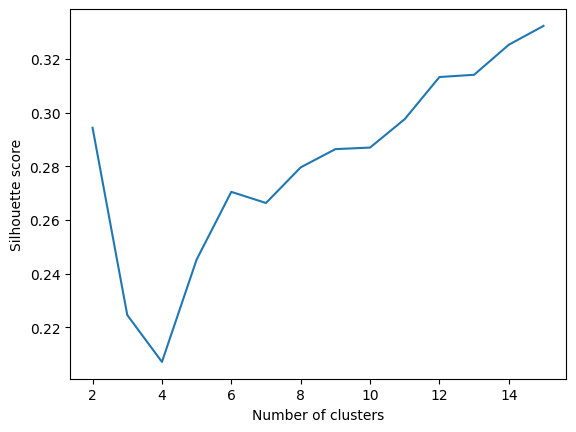

In [257]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(pca_df)
    score = silhouette_score(pca_df, y_hc)
    #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    # append the score to the list
    silhouette_scores.append(score)
# plot the silhouette scores against the number of clusters
plt.plot(range_n_clusters,silhouette_scores )
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

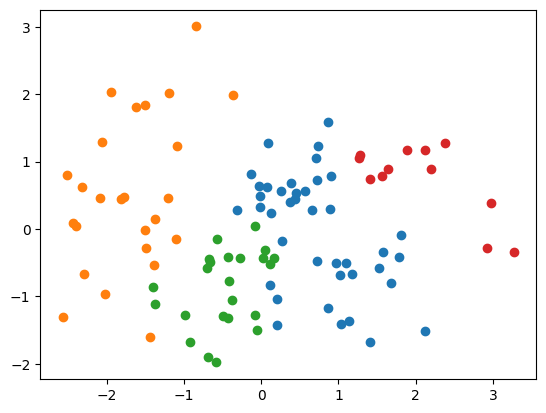

Silhouette Coefficient: 0.207
davies_bouldin_score 1.343


In [258]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 4)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(pca_df)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(pca_df[row_ix, 0], pca_df[row_ix, 1])
# show the plot
plt.grid(False)
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(pca_df,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_df, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(pca_df, y_hc))

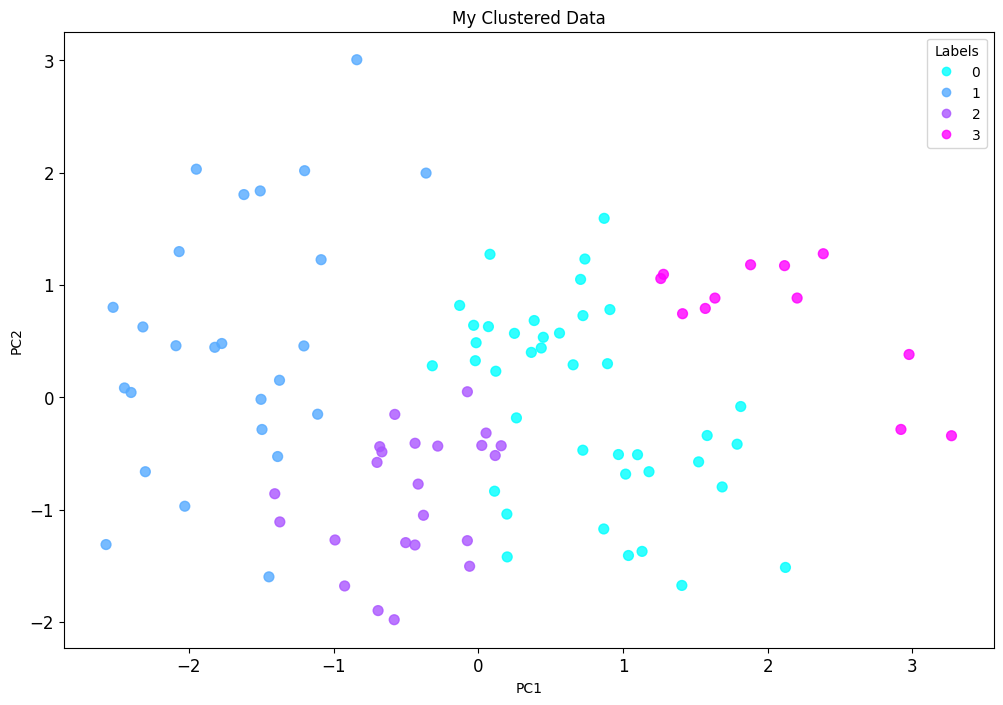

In [259]:
# Converting the PCA data matrix into a Pandas Dataframe
pca = pd.DataFrame(columns=['pc1', 'pc2', 'pc3'])
pca['pc1'] = pca_df[:,0]
pca['pc2'] = pca_df[:,1]
pca['pc3'] = pca_df[:,2]
pca['labels'] = y_hc

# Create scatter plot with larger and thicker data points
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=pca['pc1'], y=pca['pc2'], c=pca['labels'], s=50, cmap='cool', alpha=0.8)
plt.title('My Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, loc='best', title='Labels')

plt.show()

In [260]:
# adding cluster labels to the original restaurants data
cluster_org_df = cluster_org_df[['Restaurant', 'Cost', 'Rating', 'Cuisines']]
cluster_org_df['labels'] = y_hc

#Cluster 1 - Local Street/Fast Food

In [240]:
cluster_org_df[cluster_org_df['labels']==0]

Restaurant  Cost    Rating  \
6                     American Wild Wings   600  3.974026   
14                        Behrouz Biryani   600  2.825000   
15                           Being Hungry   450  3.660000   
17                      Biryanis And More   500  3.740000   
18                             Cafe Eclat   700  3.590000   
20                       Chinese Pavilion  1000  3.745000   
21                             Club Rogue   900  2.880000   
24                               Delhi-39   600  2.975000   
25                          Deli 9 Bistro   700  3.820000   
26                             Desi Bytes   400  2.900000   
29                         Domino's Pizza   400  3.090000   
30                            Driven Cafe   600  3.745000   
31                         Dunkin' Donuts   550  3.095000   
33                                 Faasos   600  3.030000   
37                                   GD's   500  3.960000   
38                          Gal Punjab Di   800  3.610000   
40              Hitech Bawarchi Food Zone   500  3.050000   
41                       Hotel Zara Hi-Fi   400  2.400000   
43                        Hyderabad Chefs   600  3.810000   
44                      Hyderabadi Daawat   600  3.830000   
47                                    KFC   500  2.850000   
49                         Karachi Bakery   500  3.800000   
50                           Karachi Cafe   600  3.715000   
51                             Khaan Saab  1100  3.800000   
53                    Kritunga Restaurant   500  3.470000   
55                                Labonel  1000  3.915000   
57                          Mathura Vilas   500  2.820000   
62                    NorFest - The Dhaba   550  4.030000   
66                          Pakwaan Grand   400  2.710000   
72                 Royal Spicy Restaurant   700  3.740000   
74               Sardarji's Chaats & More   400  3.250000   
78  Shree Santosh Dhaba Family Restaurant   500  2.830000   
81                    Tandoori Food Works   500  3.270000   
83                     The Chocolate Room   600  2.830000   
85             The Foodie Monster Kitchen   500  3.580000   
91                             Tiki Shack  1000  3.480000   
93                         Udipi's Upahar   500  4.030000   
96  Yum Yum Tree - The Arabian Food Court  1200  3.560000   
98               Zing's Northeast Kitchen   550  3.650000   
99                                eat.fit   500  3.200000   

                                             Cuisines  labels  
6                [American, Fast Food, Salad, Burger]       0  
14                                 [Mughlai, Biryani]       0  
15                            [North Indian, Chinese]       0  
17                   [North Indian, Biryani, Chinese]       0  
18                                     [Cafe, Bakery]       0  
20                                 [Chinese, Seafood]       0  
21                          [North Indian, Fast Food]       0  
24                            [North Indian, Chinese]       0  
25                      [Cafe, Continental, Desserts]       0  
26                            [North Indian, Chinese]       0  
29                                 [Fast Food, Pizza]       0  
30                       [Cafe, Fast Food, Beverages]       0  
31     [Desserts, Cafe, Beverages, Burger, Fast Food]       0  
33                     [Fast Food, Biryani, Desserts]       0  
37                                 [Burger, American]       0  
38                        [North Indian, Continental]       0  
40                   [Biryani, North Indian, Chinese]       0  
41                            [Chinese, North Indian]       0  
43                            [North Indian, Chinese]       0  
44                     [Hyderabadi, Chinese, Mughlai]       0  
47                                [Burger, Fast Food]       0  
49                      [Bakery, Fast Food, Desserts]       0  
50                        [Cafe, Desserts, Fast Food]    

#Cluster 2 - Premium Continental Restaurants

In [241]:
cluster_org_df[cluster_org_df['labels']==1]

Restaurant  Cost    Rating  \
0                                   10 Downing Street  1900  3.800000   
2                      3B's - Buddies, Bar & Barbecue  1100  4.760000   
3                           AB's - Absolute Barbecues  1500  4.880000   
8                                        Arena Eleven  1600  4.117647   
11                                             B-Dubs  1600  4.810000   
13                                    Barbeque Nation  1600  4.120000   
16                                    Beyond Flavours   800  4.280000   
19            Cascade - Radisson Hyderabad Hitec City  1800  4.260000   
22               Collage - Hyatt Hyderabad Gachibowli  2800  3.410000   
34                   Feast - Sheraton Hyderabad Hotel  2500  4.220000   
35                                           Flechazo  1300  4.660000   
36                                        Frio Bistro  1200  3.610000   
46  Jonathan's Kitchen - Holiday Inn Express & Suites  1900  3.535000   
52            Komatose - Holiday Inn Express & Suites  1500  3.690000   
58              Mazzo - Marriott Executive Apartments  1700  4.190000   
61                             Mustang Terrace Lounge  1300  3.310000   
64                         Over The Moon Brew Company  1200  4.340000   
67                                           Paradise   800  4.700000   
70                                         PourHouse7  1200  3.860000   
71                               Prism Club & Kitchen  1200  4.215000   
84                              The Fisherman's Wharf  1500  4.220000   
86                                    The Glass Onion  1200  3.830000   
87                                     The Indi Grill  1500  4.600000   
90                              The Tilt Bar Republic  1500  3.845000   
97                    Zega - Sheraton Hyderabad Hotel  1750  4.450000   

                                             Cuisines  labels  
0                [North Indian, Chinese, Continental]       1  
2             [North Indian, Mediterranean, European]       1  
3             [European, Mediterranean, North Indian]       1  
8                                       [Continental]       1  
11                                         [American]       1  
13          [Mediterranean, North Indian, Kebab, BBQ]       1  
16  [Chinese, Continental, Kebab, European, South ...       1  
19        [North Indian, Italian, Continental, Asian]       1  
22  [Continental, Italian, North Indian, Chinese, ...       1  
34       [Modern Indian, Asian, Continental, Italian]       1  
35     [Asian, Mediterranean, North Indian, Desserts]       1  
36          [European, Italian, Continental, Spanish]       1  
46    [North Indian, Japanese, Italian, Salad, Sushi]       1  
52           [North Indian, Chinese, Japanese, Sushi]       1  
58       [Italian, North Indian, South Indian, Asian]       1  
61   [Mexican, Italian, North Indian, Chinese, Salad]       1  
64  [Asian, Continental, North Indian, Chinese, Me...       1  
67                   [Biryani, North Indian, Chinese]       1  
70      [North Indian, Continental, Chinese, Italian]       1  
71        [Kebab, Continental, Italian, North Indian]       1  
84  [Seafood, Goan, North Indian, Continental, Asian]       1  
86        [North Indian, Continental, Italian, Asian]       1  
87                        [BBQ, Asian, Modern Indian]       1  
90               [North Indian, Continental, Italian]       1  
97                                     [Asian, Sushi]       1

#Cluster 3 - International Cuisines

In [242]:
cluster_org_df[cluster_org_df['labels']==2]

Restaurant  Cost  Rating  \
4                     Absolute Sizzlers   750   3.620   
5                    Al Saba Restaurant   750   3.155   
9                          Aromas@11SIX   750   3.460   
12  Banana Leaf Multicuisine Restaurant   700   3.690   
27                         Dine O China   850   3.370   
28                      Diners Pavilion  1200   3.320   
32                    Eat India Company  1300   3.260   
39            Green Bawarchi Restaurant   700   3.490   
45                          Hyper Local  1000   3.640   
54           La La Land - Bar & Kitchen  1000   3.190   
56                 Marsala Food Company   700   3.460   
63                         Olive Garden   700   3.760   
65                          Owm Nom Nom   900   3.290   
68                          Pista House  1000   3.230   
69                           Pot Pourri   900   3.320   
73                                SKYHY  1400   3.370   
75       Shah Ghouse Hotel & Restaurant   800   3.210   
77                      Shanghai Chef 2   800   3.060   
79                   Squeeze @ The Lime   650   3.815   
80                              T Grill   700   3.170   
88        The Lal Street - Bar Exchange  1300   3.450   
94                           Ulavacharu  1400   3.225   
95           Urban Asia - Kitchen & Bar  1100   3.650   

                                             Cuisines  labels  
4                    [Continental, American, Chinese]       2  
5   [North Indian, Chinese, Seafood, Biryani, Hyde...       2  
9           [North Indian, Chinese, Mughlai, Biryani]       2  
12  [Biryani, South Indian, North Indian, Chinese,...       2  
27                            [Chinese, Asian, Momos]       2  
28                    [Chinese, Continental, Italian]       2  
32                 [North Indian, Mughlai, Beverages]       2  
39                   [North Indian, Chinese, Biryani]       2  
45  [American, Chinese, North Indian, Kebab, South...       2  
54        [Finger Food, North Indian, Kebab, Chinese]       2  
56                   [Arabian, North Indian, Chinese]       2  
63      [North Indian, Chinese, Continental, Biryani]       2  
65           [Chinese, Biryani, Andhra, North Indian]       2  
68   [Bakery, North Indian, Mughlai, Juices, Chinese]       2  
69               [Andhra, South Indian, North Indian]       2  
73               [North Indian, Chinese, Continental]       2  
75  [Biryani, North Indian, Chinese, Seafood, Beve...       2  
77                 [Chinese, Thai, Indonesian, Asian]       2  
79            [Italian, North Indian, Chinese, Salad]       2  
80           [North Indian, Andhra, Biryani, Chinese]       2  
88               [North Indian, Italian, Finger Food]       2  
94                    [Andhra, North Indian, Chinese]       2  
95               [Asian, Thai, Chinese, Sushi, Momos]       2

#Cluster 4 - Cafe, Ice Creams and Desserts

In [243]:
cluster_org_df[cluster_org_df['labels']==3]

Restaurant  Cost    Rating  \
1                        13 Dhaba   450  3.480000   
7                            Amul   150  3.940000   
10                 Asian Meal Box   200  2.580000   
23                    Cream Stone   350  3.845000   
42             Hunger Maggi Point   200  3.120000   
48                      KS Bakers   200  3.965000   
59            Mohammedia Shawarma   150  2.990000   
60                  Momos Delight   200  3.725000   
76       Shah Ghouse Spl Shawarma   300  3.430000   
82                       Tempteys   350  3.850000   
89  The Old Madras Baking Company   350  3.616162   
92                       Triptify   400  3.550000   

                         Cuisines  labels  
1                  [North Indian]       3  
7           [Ice Cream, Desserts]       3  
10                        [Asian]       3  
23          [Ice Cream, Desserts]       3  
42                    [Fast Food]       3  
48  [Bakery, Desserts, Fast Food]       3  
59         [Street Food, Arabian]       3  
60                        [Momos]       3  
76                     [Lebanese]       3  
82          [Desserts, Beverages]       3  
89                       [Bakery]       3  
92                 [North Indian]       3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KMeans Clustering

I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

Agglomerative Hierarchical Clustering

I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 4 and then vizualized the clusters and the datapoints within it.



#### 2. Cross- Validation & Hyperparameter Tuning

In [244]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Not Needed

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not Needed

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Not Needed

### ML Model - 2

#Topic Modeling

Latent Dirchallent Allocation(LDA)

In [245]:
# ML Model - 2 Implementation
from sklearn.decomposition import LatentDirichletAllocation

# Choose a topic modeling algorithm
lda_model = LatentDirichletAllocation(n_components=4, random_state=5)

# Train the topic model
lda_model.fit(X_tfidf)

LatentDirichletAllocation(n_components=4, random_state=5)

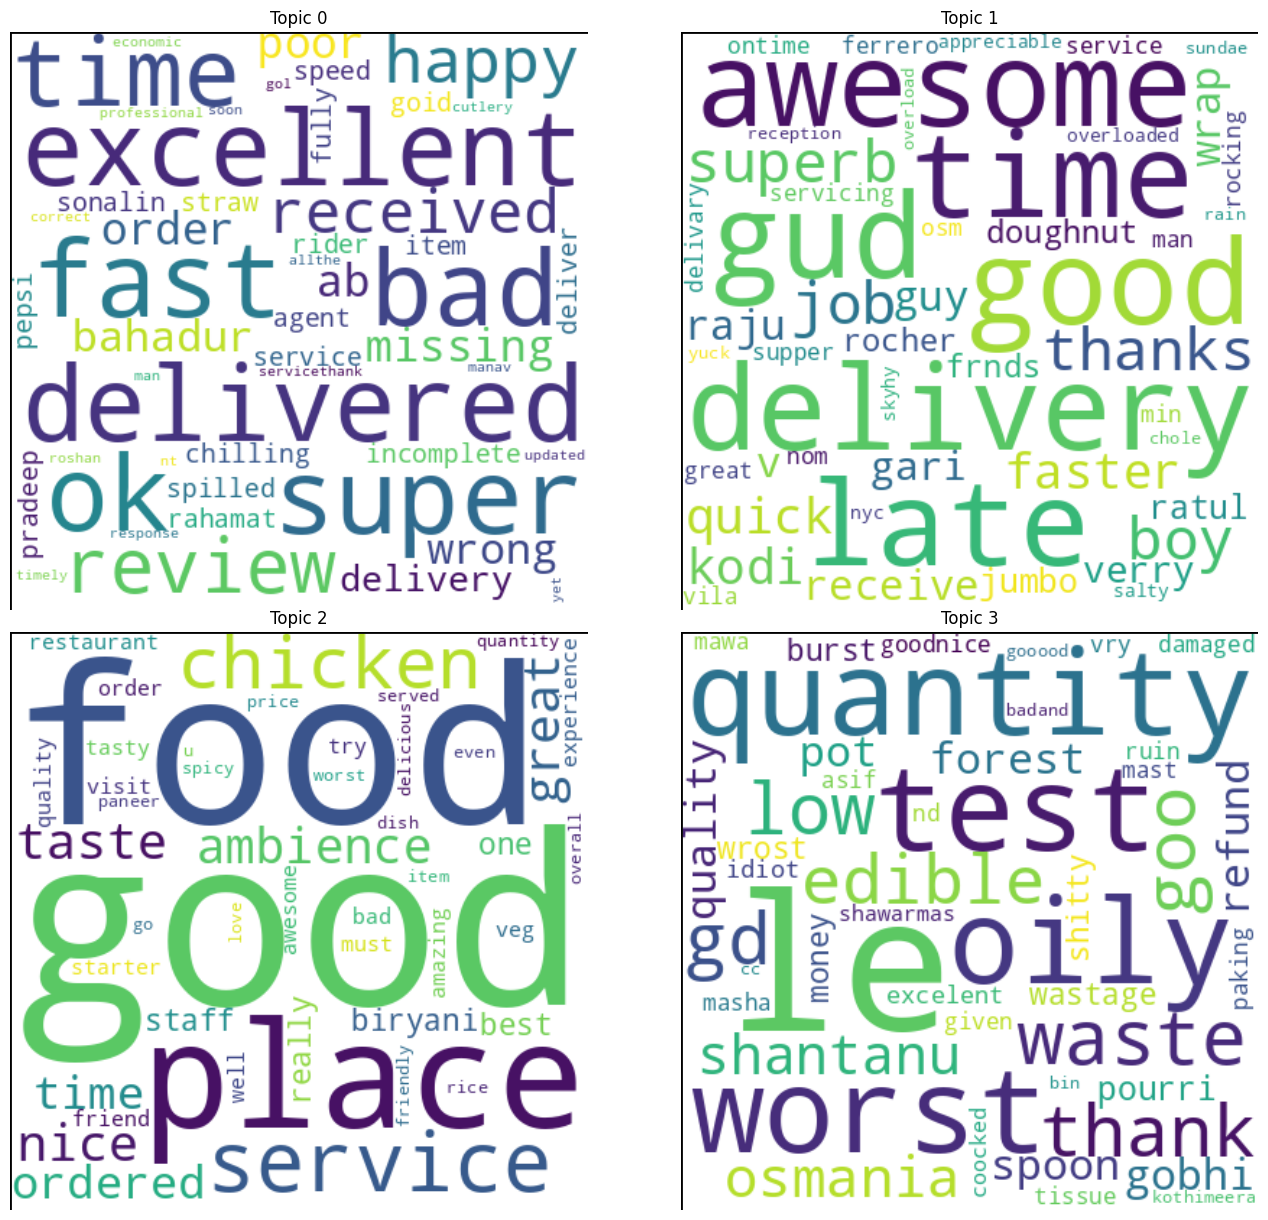

In [246]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already defined lda_model and X_tfidf

# Get the feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Create subplots for displaying word clouds
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Interpreting the results
for topic_idx, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=400, height=400,
                          background_color='white',
                          stopwords=None,
                          min_font_size=10).generate(" ".join([feature_names[i]
                          for i in topic.argsort()[:-50 - 1:-1]])) # Top 50 words for each Topic

    # plot the WordCloud image
    ax = axs[topic_idx // 2][topic_idx % 2]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title("Topic {}".format(topic_idx))
    ax.axis("off")
    ax.add_artist(plt.Rectangle((-.5, -.5), wordcloud.width + 1,
                                wordcloud.height + 1, fill=False, edgecolor='black', linewidth=2))
    plt.tight_layout(pad=0)

plt.show()


 topic modeling is a valuable tool for uncovering the hidden structure within textual data, enabling more efficient analysis and understanding of large document collections.It works by grouping similar words and phrases together to create a set of topics that can be used to summarize the content of the text.

Here is what we can approximatly infer from each Topic.

Topic 0: Personal Review Preferences

Topic 1: Positive Reviews

Topic 2: Reviews based on Service quality

Topic 3: Reviews based on Quantity, Delivery etc.

 However, when it comes to analyzing reviews data of critics for Zomato restaurants, topic modeling may not be as impactful. This is because critics' reviews are often highly subjective and can vary greatly in terms of language and writing style. This makes it difficult to identify clear and consistent themes or topics across different reviews.

**Positive, Negative and Neutral Sentiments of Data**

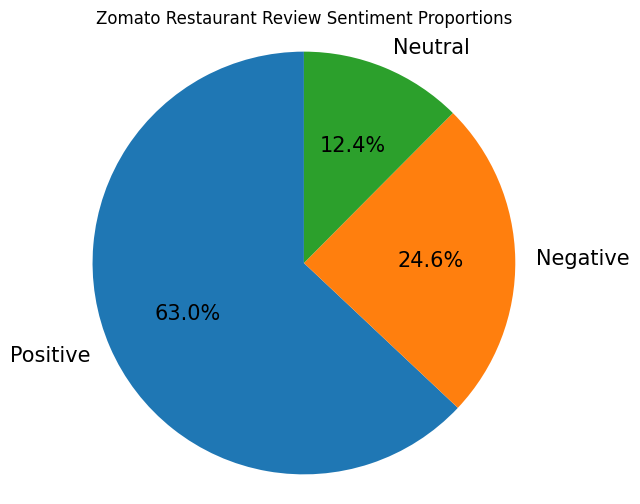

In [248]:
# Count the number of reviews for each sentiment
sentiment_counts = sentiment_df['Sentiment'].value_counts()

# Create a pie chart to show the proportion of reviews for each sentiment
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sentiment_counts, labels=sentiment_counts.index,
       autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Zomato Restaurant Review Sentiment Proportions')

plt.show()



**Extracting Negative words from reviews that provide us areas of improvements in Restaurants.**

In [261]:
# Create a list of negative words compatible to zomato data
negative_words = ['bad', 'poor', 'terrible', 'horrible', 'awful', 'disgusting', 'unsatisfactory', 'disappointing',
                  'unappetizing', 'bland', 'tasteless', 'stale', 'undercooked', 'overcooked', 'burnt', 'greasy', 'fatty',
                  'soggy', 'unhygienic', 'slow', 'rude', 'unprofessional', 'overpriced']


# Create a dictionary to store the negative words for each restaurant
restaurant_negative_words = {}

for index, row in sentiment_df.iterrows():
    # Get the restaurant name and review text from the row
    restaurant = row['Restaurant']
    review_text_list = row['Review']  # Assuming the 'Review' column contains lists of review texts

    # Convert the list of review texts to a single string
    review_text = " ".join(review_text_list)

    # Tokenize the review text into individual words
    review_words = review_text.split()

    # Find the negative words in the review
    negative_words_in_review = [word.lower() for word in review_words if word.lower() in negative_words]

    # Add the negative words to the list for the corresponding restaurant
    if restaurant in restaurant_negative_words:
        restaurant_negative_words[restaurant].extend(negative_words_in_review)
    else:
        restaurant_negative_words[restaurant] = negative_words_in_review

# Convert the dictionary to a dataframe
df_negative_words = pd.DataFrame(list(restaurant_negative_words.items()), columns=['Restaurant', 'negative_words'])

# merging the average ratings n this data (average rating is previously stored in varible)
negative_df = pd.merge(df_negative_words, price_point, left_on='Restaurant',
                       right_on='Restaurant', how='left')[['Restaurant', 'negative_words', 'Rating']]

#negative_df.head(3)


negative_df.head(3)


Restaurant                                     negative_words  Rating
0  Beyond Flavours  [stale, bad, bad, bad, bad, disappointing, slo...    4.28
1         Paradise                          [bad, bad, disappointing]    4.70
2         Flechazo                [disappointing, terrible, bad, bad]    4.66

In [262]:
# creating fnction to plot wordcloud

def word_cld_genrator(lists_of_words, title, axis):

    # creating a single word list of all negative words.
    words = []
    for word_list in lists_of_words:
        words.extend(word_list)

    # join the words in the list into a single string
    text = ' '.join(words)

    # generate the word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          min_font_size=10, random_state=5).generate(text)

    # plot the word cloud
    plt.subplot(1, 2, axis)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=3)
    plt.title(title, size=15)

**Areas of Improvements for Restaurants**

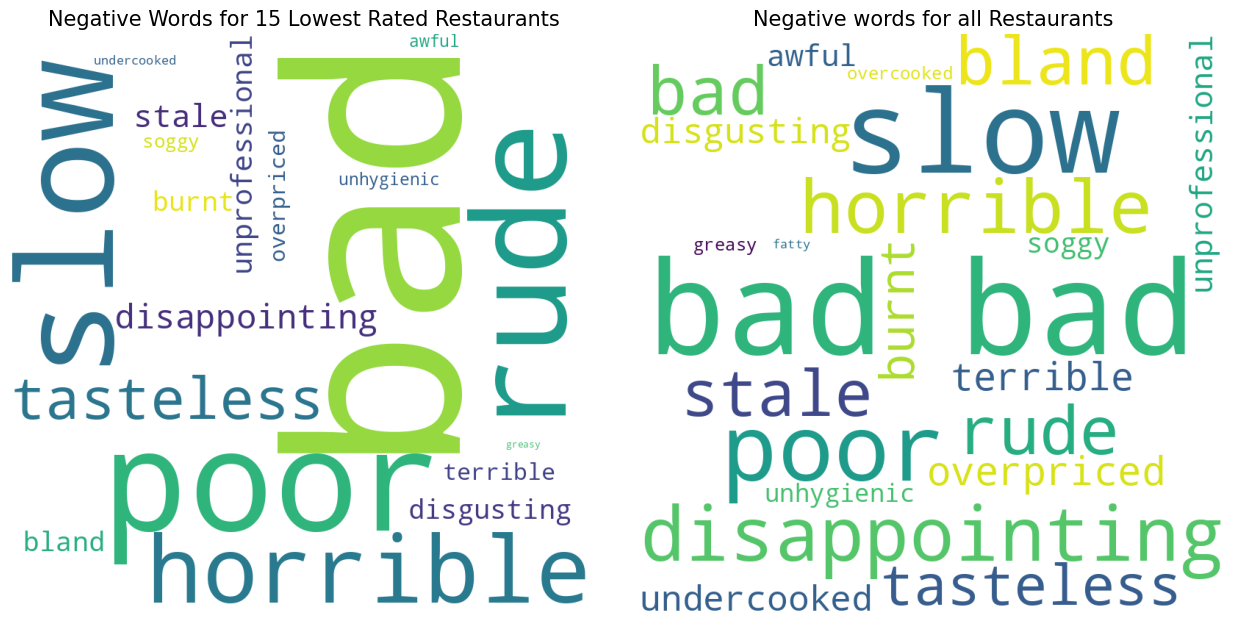

In [263]:
# getting negative words of 15 lowest rated restaurants into a list
lists_of_words = negative_df.sort_values('Rating').head(15)['negative_words'].tolist()
# all negative words from the reviews data
all_words = negative_df['negative_words'].tolist()

# creating a figure
plt.figure(figsize=(13, 15), facecolor=None)

word_cld_genrator(lists_of_words, 'Negative Words for 15 Lowest Rated Restaurants', 1)
word_cld_genrator(all_words, 'Negative words for all Restaurants', 2)

**Areas of Improvements-**

For Lowest Rated Restaurants:

*  Taste
*  Price
*  Behaviour
*  hygiene

For Overall Restaurants:

*  Behaviour
*  Quality
*  Service Time
*  Experience

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [269]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [270]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Not Needed

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Not required

### ML Model - 3

In [264]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [265]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [266]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [267]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [268]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project aimed to provide insights for zomato and restaurant owners to improve their businesses using two datasets: restaurant data and reviews data. Through exploratory data analysis, we identified interesting patterns and trends in the data. We also applied various feature engineering techniques to extract sentiments from the reviews and identify key areas of improvement based on negative reviews.

important discoveries during analysis are -

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Our clustering results revealed four distinct clusters of restaurants:
Cafe, Ice Creams and Desserts,
International Cuisines,
Premium Continental Restaurants,
Local Street/Fast Food.

In future work, we could explore building a recommendation system for users based on their ratings and preferences. Overall, this project demonstrates the power of combining data from multiple sources and applying various data analysis techniques to uncover valuable insights for Zomato and business owners.